In [13]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
from scipy import signal
import sacc
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rc('legend',fontsize=18)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

### Load Samples

In [14]:
HMC_64_path  = "../new_summaries/unmasked/HMC_summaries_use_map_true_masking_false_Nside_64_N_25_ϵ_0.1/"
MCHMC_64_path  = "../new_summaries/unmasked/MCHMC_summaries_Nside_64_use_map_true_masking_false_precond_nothing_L_70.0_TEV_0.0001/"

HMC_128_path  = "../new_summaries/unmasked/HMC_summaries_use_map_true_masking_false_Nside_128_N_25_ϵ_0.0005/"
MCHMC_128_path  = "../new_summaries/unmasked/MCHMC_summaries_Nside_128_use_map_true_masking_false_precond_nothing_L_70.0_TEV_1.0e-5/"

HMC_256_path  = "../new_summaries/unmasked/HMC_summaries_use_map_true_masking_false_Nside_256_N_25_ϵ_0.005/"
MCHMC_256_path  = "../new_summaries/unmasked/MCHMC_summaries_Nside_256_use_map_true_masking_false_precond_nothing_L_70.0_TEV_5.0e-5/"

HMC_512_path  = "../new_summaries/unmasked/HMC_summaries_use_map_true_masking_false_Nside_512_N_25_ϵ_0.005/"
MCHMC_512_path  = "../new_summaries/unmasked/MCHMC_summaries_Nside_512_use_map_true_masking_false_precond_nothing_L_70.0_TEV_1.0e-5/"

In [15]:
HMC_hyperparams_64_eps_01 = np.load("../new_summaries/test/HMC_hyperparams_Nside_64_eps_01.npz")
HMC_hyperparams_64_eps_005 = np.load("../new_summaries/test/HMC_hyperparams_Nside_64_eps_005.npz")
HMC_hyperparams_64_eps_001 = np.load("../new_summaries/test/HMC_hyperparams_Nside_64_eps_001.npz")

MCHMC_hyperparams_512_TEV_0001 = np.load("../new_summaries/unmasked/MCHMC_summaries_Nside_512_use_map_true_masking_false_precond_nothing_L_70.0_TEV_0.0001/hyperparams_1_10000.npz")
MCHMC_hyperparams_512_TEV_005 = np.load("../new_summaries/unmasked/MCHMC_summaries_Nside_512_use_map_true_masking_false_precond_nothing_L_70.0_TEV_0.005/hyperparams_1_10000.npz")
MCHMC_hyperparams_512_TEV_01 = np.load("../new_summaries/unmasked/MCHMC_summaries_Nside_512_use_map_true_masking_false_precond_nothing_L_70.0_TEV_0.01/hyperparams_1_10000.npz")

MCHMC_ESS_512_TEV_0001 = np.load("../new_summaries/unmasked/MCHMC_summaries_Nside_512_use_map_true_masking_false_precond_nothing_L_70.0_TEV_0.0001/ESS_1_10000.npz")
MCHMC_ESS_512_TEV_005 = np.load("../new_summaries/unmasked/MCHMC_summaries_Nside_512_use_map_true_masking_false_precond_nothing_L_70.0_TEV_0.005/ESS_1_10000.npz")
MCHMC_ESS_512_TEV_01 = np.load("../new_summaries/unmasked/MCHMC_summaries_Nside_512_use_map_true_masking_false_precond_nothing_L_70.0_TEV_0.01/ESS_1_10000.npz")

In [16]:
MUSE_hyperparams_64  = np.load("../summaries/unmasked/hyperparams/MUSE_hyperparams_Nside_64.npz")
MUSE_hyperparams_128  = np.load("../summaries/unmasked/hyperparams/MUSE_hyperparams_Nside_128.npz")
MUSE_hyperparams_256  = np.load("../summaries/unmasked/hyperparams/MUSE_hyperparams_Nside_256.npz")
MUSE_hyperparams_512  = np.load("../summaries/unmasked/hyperparams/MUSE_hyperparams_Nside_512.npz")

MUSE_ESS_64          = np.load("../summaries/unmasked/ESS/MUSE_ESS_Nside_64.npz")
MUSE_ESS_128         = np.load("../summaries/unmasked/ESS/MUSE_ESS_Nside_128.npz")
MUSE_ESS_256         = np.load("../summaries/unmasked/ESS/MUSE_ESS_Nside_256.npz")
MUSE_ESS_512         = np.load("../summaries/unmasked/ESS/MUSE_ESS_Nside_512.npz")

MUSE_hyperparams_masked_512  = np.load("../summaries/masked/hyperparams/MUSE_hyperparams_masked_Nside_512.npz")

true_cls_64         = np.load("../new_summaries/unmasked/true_cls_Nside_64.npz")
#HMC_hyperparams_64 = np.load(HMC_64_path+"hyperparams_1_18200.npz")
HMC_hyperparams_64  = np.load("../summaries/unmasked/hyperparams/HMC_hyperparams_Nside_64.npz")
HMC_ESS_64          = np.load("../summaries/unmasked/ESS/HMC_ESS_Nside_64.npz")
#HMC_ESS_64         = np.load(HMC_64_path+"ESS_1_18200.npz")
#HMC_cls_64         = np.load(HMC_64_path+"cls_1_18200.npz")
HMC_cls_64          = np.load("../summaries/unmasked/cls/HMC_cls_Nside_64.npz")

MCHMC_hyperparams_64 = np.load(MCHMC_64_path+"hyperparams_ext_1_20000.npz")
MCHMC_ESS_64         = np.load(MCHMC_64_path+"ESS_1_20000.npz")
MCHMC_cls_64         = np.load(MCHMC_64_path+"cls_1_20000.npz")

true_cls_128         = np.load("../new_summaries/unmasked/true_cls_Nside_128.npz")
#HMC_hyperparams_128 = np.load(HMC_128_path+"hyperparams_1_18200.npz")
HMC_hyperparams_128  = np.load("../summaries/unmasked/hyperparams/HMC_hyperparams_Nside_128.npz")
HMC_ESS_128          = np.load("../summaries/unmasked/ESS/HMC_ESS_Nside_128.npz")
#HMC_ESS_128         = np.load(HMC_128_path+"ESS_1_18200.npz")
#HMC_cls_128         = np.load(HMC_128_path+"cls_1_18200.npz")
HMC_cls_128          = np.load("../summaries/unmasked/cls/HMC_cls_Nside_128.npz")

MCHMC_hyperparams_128 = np.load(MCHMC_128_path+"hyperparams_ext_1_20000.npz")
MCHMC_ESS_128         = np.load(MCHMC_128_path+"ESS_1_20000.npz")
MCHMC_cls_128         = np.load(MCHMC_128_path+"cls_1_20000.npz")

true_cls_256         = np.load("../new_summaries/unmasked/true_cls_Nside_256.npz")
#HMC_hyperparams_256 = np.load(HMC_256_path+"hyperparams_1_18200.npz")
HMC_hyperparams_256  = np.load("../summaries/unmasked/hyperparams/HMC_hyperparams_Nside_256.npz")
HMC_ESS_256          = np.load("../summaries/unmasked/ESS/HMC_ESS_Nside_256.npz")
#HMC_ESS_256         = np.load(HMC_256_path+"ESS_1_18200.npz")
#HMC_cls_256         = np.load(HMC_256_path+"cls_1_18200.npz")
HMC_cls_256          = np.load("../summaries/unmasked/cls/HMC_cls_Nside_256.npz")

MCHMC_hyperparams_256 = np.load(MCHMC_256_path+"hyperparams_ext_1_20000.npz")
MCHMC_ESS_256         = np.load(MCHMC_256_path+"ESS_1_20000.npz")
MCHMC_cls_256         = np.load(MCHMC_256_path+"cls_1_20000.npz")

true_cls_512         = np.load("../new_summaries/unmasked/true_cls_Nside_512.npz")
#HMC_hyperparams_512 = np.load(HMC_512_path+"hyperparams_1_18200.npz")
HMC_hyperparams_512  = np.load("../summaries/unmasked/hyperparams/HMC_hyperparams_Nside_512.npz")
HMC_ESS_512          = np.load("../summaries/unmasked/ESS/HMC_ESS_Nside_512.npz")
#HMC_ESS_512         = np.load(HMC_512_path+"ESS_1_18200.npz")
#HMC_cls_512         = np.load(HMC_512_path+"cls_1_18200.npz")
HMC_cls_512 = np.load("../summaries/unmasked/cls/HMC_cls_Nside_512.npz")

MCHMC_hyperparams_512 = np.load(MCHMC_512_path+"hyperparams_1_20000.npz")
MCHMC_ESS_512         = np.load(MCHMC_512_path+"ESS_1_20000.npz")
MCHMC_cls_512         = np.load(MCHMC_512_path+"cls_1_20000.npz")

In [17]:
true_cls_masked_512 = np.load("../new_summaries/masked/true_cls_Nside_512_masking_true.npz")
HMC_hyperparams_masked_512  = np.load("../summaries/masked/hyperparams/HMC_hyperparams_masked_Nside_512.npz")
HMC_cls_masked_512 = np.load("../summaries/masked/cls/HMC_cls_masked_Nside_512.npz")

MCHMC_cls_masked_512 = np.load("../summaries/masked/cls/MCHMC_cls_masked_Nside_512.npz")
MCHMC_hyperparams_masked_512  = np.load("../summaries/masked/hyperparams/MCHMC_hyperparams_masked_Nside_512.npz")

In [57]:
MCHMC_hyperparams_masked_512_TEV_one5 = np.load("../new_summaries/masked/MCHMC_summaries_Nside_512_use_map_true_masking_true_precond_nothing_L_70.0_TEV_1.0e-5//hyperparams_1_10000.npz")
MCHMC_hyperparams_masked_512_TEV_one6 = np.load("../new_summaries/masked/MCHMC_summaries_Nside_512_use_map_true_masking_true_precond_nothing_L_70.0_TEV_1.0e-6//hyperparams_1_10000.npz")
MCHMC_hyperparams_masked_512_TEV_one7 = np.load("../new_summaries/masked/MCHMC_summaries_Nside_512_use_map_true_masking_true_precond_nothing_L_70.0_TEV_1.0e-7/hyperparams_1_30000.npz")
MCHMC_hyperparams_masked_512_TEV_one8 = np.load("../new_summaries/masked/MCHMC_summaries_Nside_512_use_map_true_masking_true_precond_nothing_L_70.0_TEV_1.0e-8/hyperparams_1_30000.npz")

MCHMC_ESS_masked_512_TEV_one5 = np.load("../new_summaries/masked/MCHMC_summaries_Nside_512_use_map_true_masking_true_precond_nothing_L_70.0_TEV_1.0e-5/ESS_1_10000.npz")
MCHMC_ESS_masked_512_TEV_one6 = np.load("../new_summaries/masked/MCHMC_summaries_Nside_512_use_map_true_masking_true_precond_nothing_L_70.0_TEV_1.0e-6/ESS_1_10000.npz")
MCHMC_ESS_masked_512_TEV_one7 = np.load("../new_summaries/masked/MCHMC_summaries_Nside_512_use_map_true_masking_true_precond_nothing_L_70.0_TEV_1.0e-7/ESS_1_30000.npz")
MCHMC_ESS_masked_512_TEV_one8 = np.load("../new_summaries/masked/MCHMC_summaries_Nside_512_use_map_true_masking_true_precond_nothing_L_70.0_TEV_1.0e-8/ESS_1_30000.npz")

In [58]:
def make_chain(file, label, labels_dict={'r': 'r', 'Aphi': 'A_{\phi}'}):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        if param in labels_dict.keys():
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])

    samples = MCSamples(samples=samples, names=names, labels=labels, label=label,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})    
    print("========")
    return samples

In [59]:
HMC_chain_64   = make_chain(HMC_hyperparams_64, 'HMC - Unmasked Nside=64')
MCHMC_chain_64 = make_chain(MCHMC_hyperparams_64, 'MCHMC - Unmasked Nside=64')
MUSE_chain_64  = make_chain(MUSE_hyperparams_64, 'MUSE - Unmasked  Nside=64')

HMC_chain_128 = make_chain(HMC_hyperparams_128, 'HMC - Unmasked Nside=128')
MCHMC_chain_128 = make_chain(MCHMC_hyperparams_128, 'MCHMC - Unmasked Nside=128')
MUSE_chain_128 = make_chain(MUSE_hyperparams_128, 'MUSE - Unmasked Nside=128')

HMC_chain_256 = make_chain(HMC_hyperparams_256, 'HMC - Unmasked Nside=256')
MCHMC_chain_256 = make_chain(MCHMC_hyperparams_256, 'MCHMC - Unmasked Nside=256')
MUSE_chain_256 = make_chain(MUSE_hyperparams_256, 'MUSE - Unmasked Nside=256')

HMC_chain_512   = make_chain(HMC_hyperparams_512, 'HMC - Unmasked Nside=512')
MCHMC_chain_512 = make_chain(MCHMC_hyperparams_512, 'MCHMC - Unmasked Nside=512')
MUSE_chain_512  = make_chain(MUSE_hyperparams_512, 'MUSE - Unmasked Nside=512');

HMC - Unmasked Nside=64
Removed no burn in
MCHMC - Unmasked Nside=64
Removed no burn in
MUSE - Unmasked  Nside=64
Removed no burn in
HMC - Unmasked Nside=128
Removed no burn in
MCHMC - Unmasked Nside=128
Removed no burn in
MUSE - Unmasked Nside=128
Removed no burn in
HMC - Unmasked Nside=256
Removed no burn in
MCHMC - Unmasked Nside=256
Removed no burn in
MUSE - Unmasked Nside=256
Removed no burn in
HMC - Unmasked Nside=512
Removed no burn in
MCHMC - Unmasked Nside=512
Removed no burn in
MUSE - Unmasked Nside=512
Removed no burn in


In [60]:
HMC_chain_64_01 = make_chain(HMC_hyperparams_64_eps_01, "HMC Nside 64 ϵ=0.1")
HMC_chain_64_005 = make_chain(HMC_hyperparams_64_eps_005, "HMC Nside 64 ϵ=0.005")
HMC_chain_64_001 = make_chain(HMC_hyperparams_64_eps_001, "HMC Nside 64 ϵ=0.001")

MCHMC_chain_512_01 = make_chain(MCHMC_hyperparams_512_TEV_01, "MCHMC Nside 512 TEV=0.01")
MCHMC_chain_512_005 = make_chain(MCHMC_hyperparams_512_TEV_005, "MCHMC Nside 512 TEV=0.005")
MCHMC_chain_512_0001 = make_chain(MCHMC_hyperparams_512_TEV_0001, "MCHMC Nside 512 TEV=0.0001")

HMC Nside 64 ϵ=0.1
Removed no burn in
HMC Nside 64 ϵ=0.005
Removed no burn in
HMC Nside 64 ϵ=0.001
Removed no burn in
MCHMC Nside 512 TEV=0.01
Removed no burn in
MCHMC Nside 512 TEV=0.005
Removed no burn in
MCHMC Nside 512 TEV=0.0001
Removed no burn in


In [61]:
HMC_chain_masked_512 = make_chain(HMC_hyperparams_masked_512, 'HMC - Masked Nside=512')
MCHMC_chain_masked_512 = make_chain(MCHMC_hyperparams_masked_512, 'MCHMC - Masked Nside=512')
MUSE_chain_masked_512  = make_chain(MUSE_hyperparams_masked_512, 'MUSE - Masked Nside=512');

HMC - Masked Nside=512
Removed no burn in
MCHMC - Masked Nside=512
Removed no burn in
MUSE - Masked Nside=512
Removed no burn in


In [62]:
MCHMC_chain_masked_512_TEV_one5 = make_chain(MCHMC_hyperparams_masked_512_TEV_one5, "MCHMC Masked Nside 512 TEV=1.0e-5")
MCHMC_chain_masked_512_TEV_one6 = make_chain(MCHMC_hyperparams_masked_512_TEV_one6, "MCHMC Masked Nside 512 TEV=1.0e-6")
MCHMC_chain_masked_512_TEV_one7 = make_chain(MCHMC_hyperparams_masked_512_TEV_one7, "MCHMC Masked Nside 512 TEV=1.0e-7")
MCHMC_chain_masked_512_TEV_one8 = make_chain(MCHMC_hyperparams_masked_512_TEV_one8, "MCHMC Masked Nside 512 TEV=1.0e-8")

MCHMC Masked Nside 512 TEV=1.0e-5
Removed no burn in
MCHMC Masked Nside 512 TEV=1.0e-6
Removed no burn in
MCHMC Masked Nside 512 TEV=1.0e-7
Removed no burn in
MCHMC Masked Nside 512 TEV=1.0e-8
Removed no burn in


### Compute ESS

In [22]:
#          HMC                                 MCLMC                                 MUSE
#ESS_64 =  [np.min(HMC_ESS_64["ESS_per_lkl"]),  np.min(MCHMC_ESS_64["ESS_per_lkl"]),  np.min(MUSE_ESS_64["ESS_per_lkl"])]
#ESS_128 = [np.min(HMC_ESS_128["ESS_per_lkl"]), np.min(MCHMC_ESS_128["ESS_per_lkl"]), np.min(MUSE_ESS_128["ESS_per_lkl"])]
#ESS_256 = [np.min(HMC_ESS_256["ESS_per_lkl"]), np.min(MCHMC_ESS_256["ESS_per_lkl"]), np.min(MUSE_ESS_256["ESS_per_lkl"])]
#ESS_512 = [np.min(HMC_ESS_512["ESS_per_lkl"]), np.min(MCHMC_ESS_512["ESS_per_lkl"]), np.min(MUSE_ESS_512["ESS_per_lkl"])]

#                   HMC     MCLMC   MUSE
ESS_64  = np.array([0.0052, np.min(MCHMC_ESS_64["ESS_per_lkl"]),  np.min(MUSE_ESS_64["ESS_per_lkl"])])
ESS_128 = np.array([0.0016, np.min(MCHMC_ESS_128["ESS_per_lkl"]), np.min(MUSE_ESS_128["ESS_per_lkl"])])
ESS_256 = np.array([0.00030,np.min(MCHMC_ESS_256["ESS_per_lkl"]), np.min(MUSE_ESS_256["ESS_per_lkl"])])
ESS_512 = np.array([0.000285, np.min(MCHMC_ESS_512["ESS_per_lkl"]), np.min(MUSE_ESS_512["ESS_per_lkl"])])

ESS_512_comp = np.array([
    np.min(MCHMC_ESS_512_TEV_01["ESS_per_lkl"]),
    np.min(MCHMC_ESS_512_TEV_005["ESS_per_lkl"]),
    np.min(MCHMC_ESS_512_TEV_0001["ESS_per_lkl"]),
    np.min(MUSE_ESS_512["ESS_per_lkl"])])


In [23]:
nsides = np.array([64, 128, 256, 512])
samplers = np.array(['HMC', 'MCLMC', 'MUSE'])

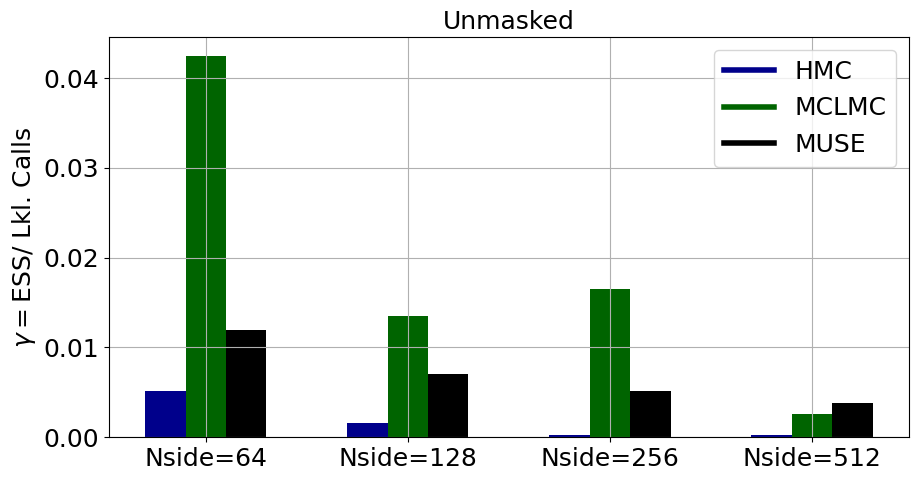

In [25]:
colors  =  ['darkblue', 'darkgreen', 'black']
X = np.arange(3)/5
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

ax.bar(X,     ESS_64,  color = colors, width = 0.2)
ax.bar(X + 1, ESS_128, color = colors, width = 0.2)
ax.bar(X + 2, ESS_256, color = colors, width = 0.2)
ax.bar(X + 3, ESS_512, color = colors, width = 0.2)

plt.ylabel(r"$\gamma=$ESS/ Lkl. Calls")
plt.xticks(np.array([X[1], X[1]+1, X[1]+2, X[1]+3]).flatten(),
           np.array([['Nside=64'], ['Nside=128'], ['Nside=256'], ['Nside=512']]).flatten())
plt.grid()
plt.title("Unmasked")

custom_lines = [Line2D([0], [0], color='darkblue', lw=4),
                Line2D([0], [0], color='darkgreen', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, samplers)
#plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/ESS_comp.pdf", bbox_inches='tight')
plt.show()

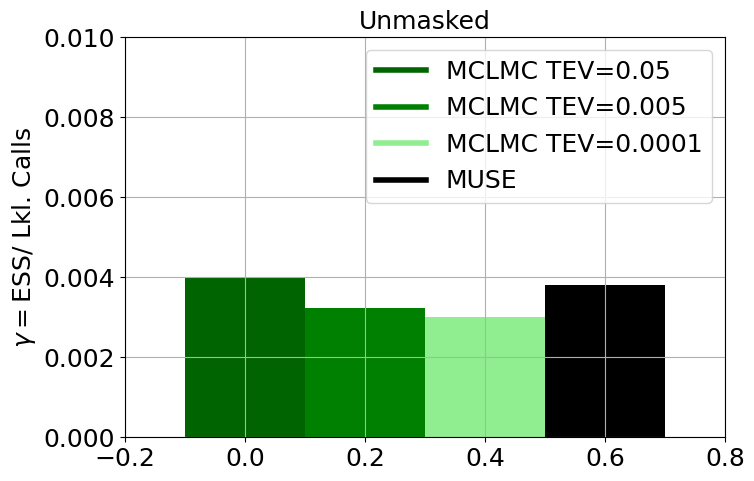

In [27]:
colors  =  ['darkgreen', 'green', 'lightgreen', 'black']
X = np.arange(4)/5
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

ax.bar(X, ESS_512_comp,  color = colors, width = 0.2)


plt.ylabel(r"$\gamma=$ESS/ Lkl. Calls")
plt.grid()
plt.title("Unmasked")

custom_lines = [Line2D([0], [0], color='darkgreen', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='lightgreen', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.xlim([-0.2, 0.8])
plt.ylim([0.0, 0.01])
plt.legend(custom_lines, ['MCLMC TEV=0.05', 'MCLMC TEV=0.005', 'MCLMC TEV=0.0001', 'MUSE'])
#plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/ESS_comp.pdf", bbox_inches='tight')
plt.show()

In [64]:
ESS_512_comp = np.array([
    np.min(MCHMC_ESS_masked_512_TEV_one5["ESS_per_lkl"]),
    np.min(MCHMC_ESS_masked_512_TEV_one6["ESS_per_lkl"]),
    np.min(MCHMC_ESS_masked_512_TEV_one7["ESS_per_lkl"]),
    np.min(MCHMC_ESS_masked_512_TEV_one8["ESS_per_lkl"]),
    0.0032])

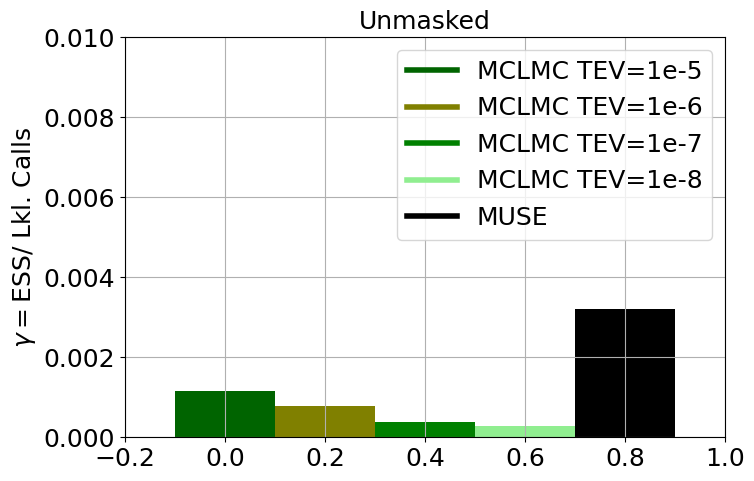

In [68]:
colors  =  ['darkgreen', 'olive', 'green', 'lightgreen', 'black']
X = np.arange(5)/5
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

ax.bar(X, ESS_512_comp,  color = colors, width = 0.2)


plt.ylabel(r"$\gamma=$ESS/ Lkl. Calls")
plt.grid()
plt.title("Masked")

custom_lines = [Line2D([0], [0], color='darkgreen', lw=4),
                Line2D([0], [0], color='olive', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='lightgreen', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.xlim([-0.2, 1.0])
plt.ylim([0.0, 0.01])
plt.legend(custom_lines, ['MCLMC TEV=1e-5', 'MCLMC TEV=1e-6', 'MCLMC TEV=1e-7', 'MCLMC TEV=1e-8', 'MUSE'])
#plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/ESS_comp.pdf", bbox_inches='tight')
plt.show()

In [28]:
eps_64_m, eps_64_s = np.mean(MCHMC_hyperparams_64["eps"]), np.std(MCHMC_hyperparams_64["eps"])
eps_128_m, eps_128_s = np.mean(MCHMC_hyperparams_128["eps"]), np.std(MCHMC_hyperparams_128["eps"])
eps_256_m, eps_256_s = np.mean(MCHMC_hyperparams_256["eps"]), np.std(MCHMC_hyperparams_256["eps"])
eps_512_m, eps_512_s = np.mean(MCHMC_hyperparams_512["eps"]), np.std(MCHMC_hyperparams_512["eps"])

eps_512_01_m, eps_512_01_s = np.mean(MCHMC_hyperparams_512_TEV_01["eps"]), np.std(MCHMC_hyperparams_512_TEV_01["eps"])
eps_512_005_m, eps_512_005_s = np.mean(MCHMC_hyperparams_512_TEV_005["eps"]), np.std(MCHMC_hyperparams_512_TEV_005["eps"])
eps_512_0001_m, eps_512_0001_s = np.mean(MCHMC_hyperparams_512_TEV_0001["eps"]), np.std(MCHMC_hyperparams_512_TEV_0001["eps"])

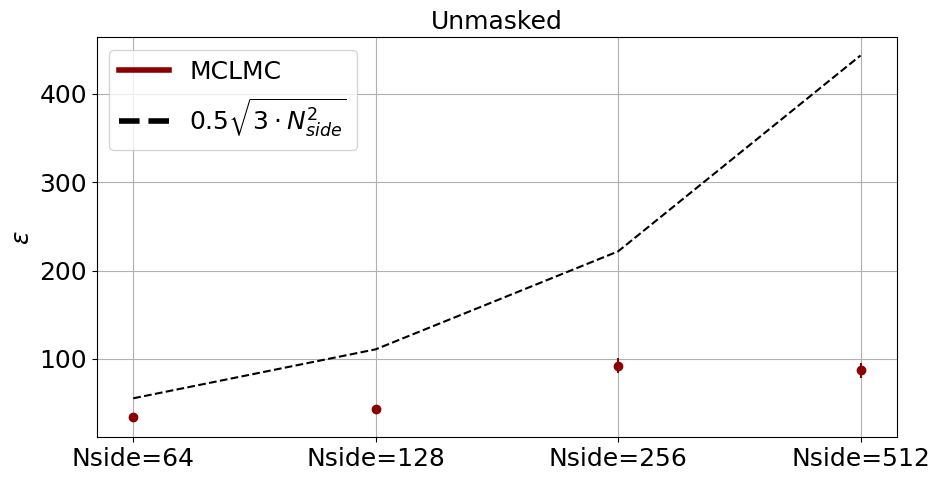

In [30]:
X = 0.2
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

plt.errorbar(X, eps_64_m, yerr=eps_64_s, fmt='o', color='darkred')
plt.errorbar(X + 1, eps_128_m, yerr=eps_128_s, fmt='o', color='darkred')
plt.errorbar(X + 2, eps_256_m, yerr=eps_256_s, fmt='o', color='darkred')
plt.errorbar(X + 3, eps_512_m, yerr=eps_512_s, fmt='o', color='darkred')

plt.plot([X, X+1, X+2, X+3], [np.sqrt(3*64**2)/2, np.sqrt(3*128**2)/2, np.sqrt(3*256**2)/2, np.sqrt(3*512**2)/2], color='black', linestyle='--')

plt.ylabel(r"$\epsilon$")
plt.xticks(np.array([X, X+1, X+2, X+3]).flatten(),
           np.array([['Nside=64'], ['Nside=128'], ['Nside=256'], ['Nside=512']]).flatten())
plt.grid()
plt.title("Unmasked")

custom_lines = [Line2D([0], [0], color='darkred', lw=4),
                Line2D([0], [0], color='black', linestyle='--', lw=4)]
plt.legend(custom_lines, ['MCLMC', r'$0.5 \sqrt{3 \cdot N_{side}^2}$'])
#plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/ESS_comp.pdf", bbox_inches='tight')
plt.show()

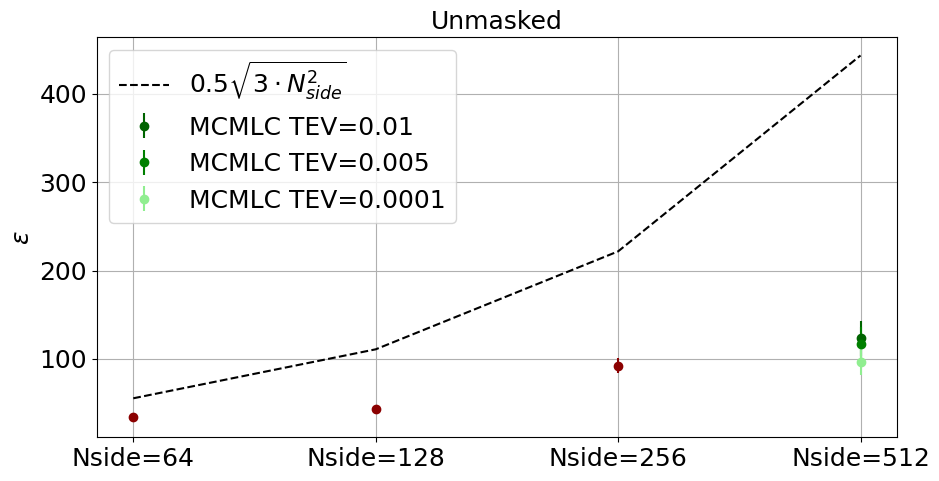

In [32]:
X = 0.2
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

plt.errorbar(X, eps_64_m, yerr=eps_64_s, fmt='o', color='darkred')
plt.errorbar(X + 1, eps_128_m, yerr=eps_128_s, fmt='o', color='darkred')
plt.errorbar(X + 2, eps_256_m, yerr=eps_256_s, fmt='o', color='darkred')

plt.errorbar(X + 3, eps_512_01_m, yerr=eps_512_01_s, fmt='o', color='darkgreen', label="MCMLC TEV=0.01")
plt.errorbar(X + 3, eps_512_005_m, yerr=eps_512_005_s, fmt='o', color='green', label="MCMLC TEV=0.005")
plt.errorbar(X + 3, eps_512_0001_m, yerr=eps_512_0001_s, fmt='o', color='lightgreen', label="MCMLC TEV=0.0001")

plt.plot([X, X+1, X+2, X+3], [np.sqrt(3*64**2)/2, np.sqrt(3*128**2)/2, np.sqrt(3*256**2)/2, np.sqrt(3*512**2)/2],
        color='black', linestyle='--', label= r'$0.5 \sqrt{3 \cdot N_{side}^2}$')

plt.ylabel(r"$\epsilon$")
plt.xticks(np.array([X, X+1, X+2, X+3]).flatten(),
           np.array([['Nside=64'], ['Nside=128'], ['Nside=256'], ['Nside=512']]).flatten())
plt.grid()
plt.title("Unmasked")

plt.legend()
#plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/ESS_comp.pdf", bbox_inches='tight')
plt.show()

### Posteriors

In [33]:
def make_table_getdist(params, chains):
    for chain in chains:
        print(chain.label, end = " ")
        for param in params:
            constraint = chain.getInlineLatex(param)
            constraint = constraint[constraint.index("=")+1:] 
            print("&", "$", constraint, "$", end = " ")
        print( "\\\\ \\hline")

In [34]:
make_table_getdist(['r', 'Aphi'], 
    [HMC_chain_64, MCHMC_chain_64, MUSE_chain_64,
     HMC_chain_128, MCHMC_chain_128, MUSE_chain_128,
     HMC_chain_256, MCHMC_chain_256, MUSE_chain_256,
     HMC_chain_512, MCHMC_chain_512, MUSE_chain_512,
     MCHMC_chain_masked_512, MUSE_chain_masked_512])

HMC - Unmasked Nside=64 & $  0.282^{+0.075}_{-0.14} $ & $  1.017\pm 0.094 $ \\ \hline
MCHMC - Unmasked Nside=64 & $  0.293^{+0.077}_{-0.15} $ & $  0.982^{+0.090}_{-0.11} $ \\ \hline
MUSE - Unmasked  Nside=64 & $  0.244^{+0.066}_{-0.16} $ & $  1.025^{+0.096}_{-0.12} $ \\ \hline
HMC - Unmasked Nside=128 & $  0.196^{+0.042}_{-0.062} $ & $  0.999^{+0.046}_{-0.054} $ \\ \hline
MCHMC - Unmasked Nside=128 & $  0.206^{+0.041}_{-0.064} $ & $  0.978\pm 0.049 $ \\ \hline
MUSE - Unmasked Nside=128 & $  0.188^{+0.037}_{-0.056} $ & $  1.014^{+0.051}_{-0.059} $ \\ \hline
HMC - Unmasked Nside=256 & $  0.149^{+0.020}_{-0.024} $ & $  1.034\pm 0.021 $ \\ \hline
MCHMC - Unmasked Nside=256 & $  0.165^{+0.020}_{-0.028} $ & $  0.9998\pm 0.028 $ \\ \hline
MUSE - Unmasked Nside=256 & $  0.163^{+0.021}_{-0.028} $ & $  1.019\pm 0.031 $ \\ \hline
HMC - Unmasked Nside=512 & $  0.176\pm 0.012 $ & $  0.995\pm 0.017 $ \\ \hline
MCHMC - Unmasked Nside=512 & $  0.178\pm 0.012 $ & $  0.991\pm 0.014 $ \\ \hline
MUSE - Un

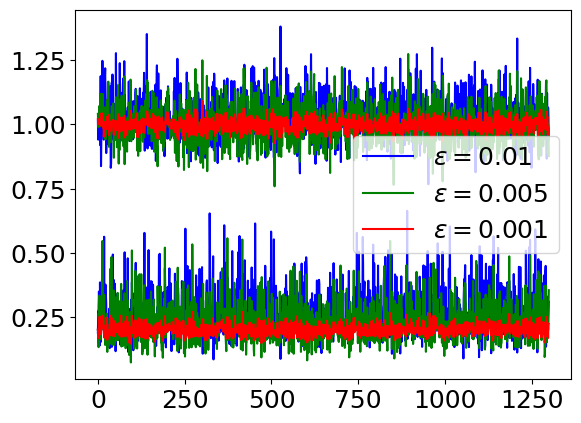

In [35]:
plt.plot(HMC_hyperparams_64_eps_01["r"], 'b-', label=r'$\epsilon=0.01$')
plt.plot(HMC_hyperparams_64_eps_005["r"], 'g-', label=r'$\epsilon=0.005$')
plt.plot(HMC_hyperparams_64_eps_001["r"], 'r-', label=r'$\epsilon=0.001$')

plt.plot(HMC_hyperparams_64_eps_01["Aphi"], 'b-')
plt.plot(HMC_hyperparams_64_eps_005["Aphi"], 'g-')
plt.plot(HMC_hyperparams_64_eps_001["Aphi"], 'r-')
plt.legend()

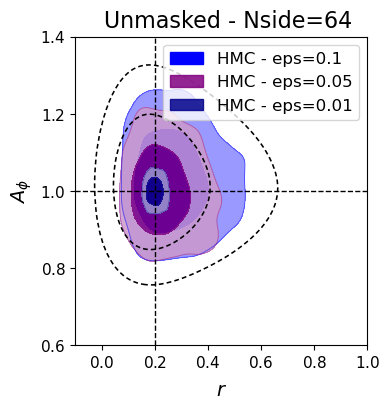

In [36]:
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([HMC_chain_64_01, HMC_chain_64_005, HMC_chain_64_001, MUSE_chain_64], 'r', 'Aphi',
           colors=['blue', 'purple', 'darkblue', 'black'], ls=['-','-', '-', '--'], 
           filled=[True, True, True, False], lims=[-0.1, 1.0, 0.6, 1.4], )
g.add_legend(['HMC - eps=0.1', 'HMC - eps=0.05', 'HMC - eps=0.01']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=64', x=0.95, y=1.05, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_64.pdf', bbox_inches='tight')

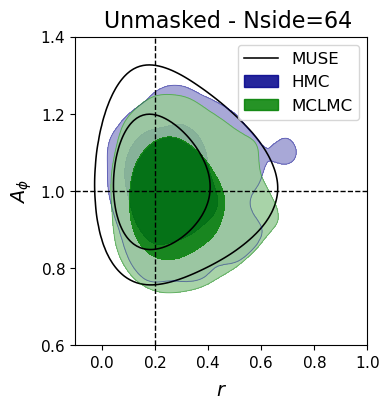

In [37]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_64, HMC_chain_64, MCHMC_chain_64], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], lims=[-0.1, 1.0, 0.6, 1.4], )
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=64', x=0.95, y=1.05, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_64.pdf', bbox_inches='tight')

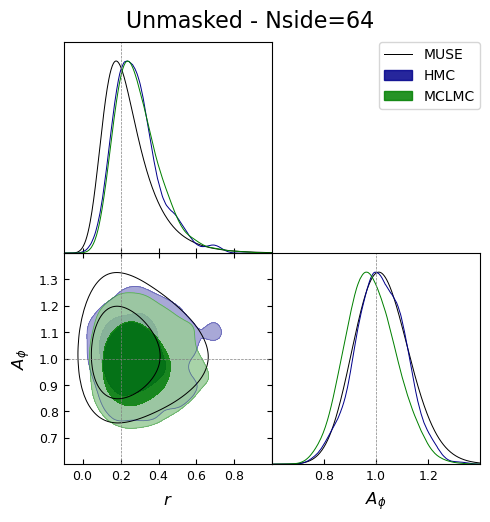

In [38]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([MUSE_chain_64, HMC_chain_64, MCHMC_chain_64], ['r', 'Aphi'], 
            markers={'r':0.2, 'Aphi':1.0},
           contour_colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], param_limits={'r':[-0.1, 1.0], 'Aphi':[0.6, 1.4]},
           legend_labels=['MUSE', 'HMC', 'MCLMC'])
g.add_text('Unmasked - Nside=64', x=-0.7, y=2.1, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_triangle_64.pdf', bbox_inches='tight')

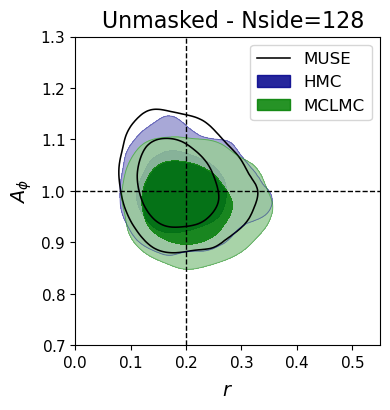

In [39]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_128, HMC_chain_128, MCHMC_chain_128], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], lims=[0., 0.55, 0.7, 1.3])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=128', x=0.95, y=1.05, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_128.pdf', bbox_inches='tight')

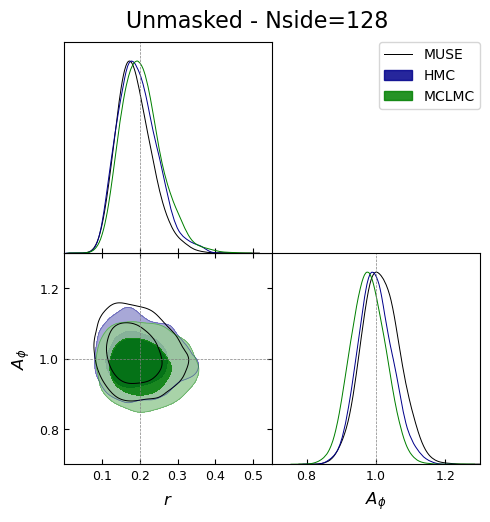

In [53]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([MUSE_chain_128, HMC_chain_128, MCHMC_chain_128], ['r', 'Aphi'],
           markers={'r':0.2, 'Aphi':1.0}, 
           contour_colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], param_limits={'r':[0., 0.55], 'Aphi':[0.7, 1.3]},
           legend_labels=['MUSE', 'HMC', 'MCLMC'])
g.add_text('Unmasked - Nside=128', x=-0.7, y=2.1, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_triangle_128.pdf', bbox_inches='tight')

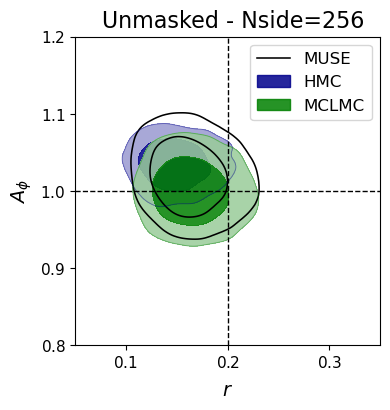

In [41]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_256, HMC_chain_256,  MCHMC_chain_256], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], lims=[0.05, 0.35, 0.8, 1.2])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=256', x=0.95, y=1.05, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_256.pdf', bbox_inches='tight')


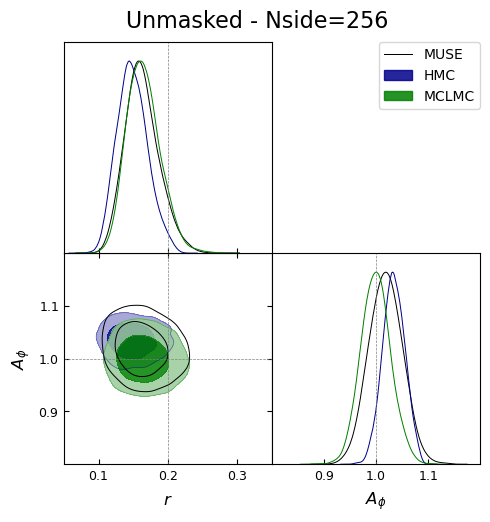

In [42]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([MUSE_chain_256, HMC_chain_256, MCHMC_chain_256], ['r', 'Aphi'],
           markers={'r':0.2, 'Aphi':1.0},
           contour_colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], param_limits={'r':[0.05, 0.35], 'Aphi':[0.8, 1.2]},
           legend_labels=['MUSE', 'HMC', 'MCLMC'])
g.add_text('Unmasked - Nside=256', x=-0.7, y=2.1, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_triangle_256.pdf', bbox_inches='tight')

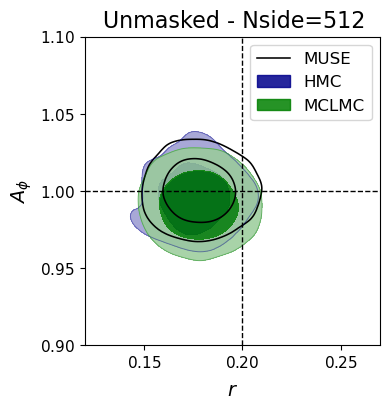

In [50]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_512, HMC_chain_512, MCHMC_chain_512], 'r', 'Aphi', 
           colors=['black', 'darkblue','green'], ls=['-','-', '-'], 
           filled=[False, True, True], lims=[0.12, 0.27, 0.9, 1.1])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Unmasked - Nside=512', x=0.95, y=1.05, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_512.pdf', bbox_inches='tight')

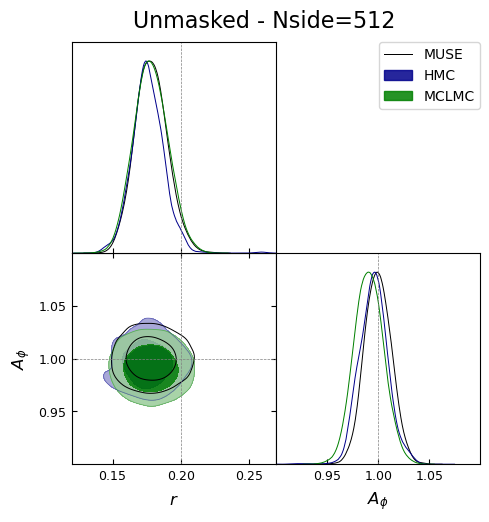

In [52]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([MUSE_chain_512, HMC_chain_512, MCHMC_chain_512], ['r', 'Aphi'],
           markers={'r':0.2, 'Aphi':1.0},
           contour_colors=['black', 'darkblue', 'green'], ls=['-','-', '-'], 
           filled=[False, True, True], legend_labels=['MUSE', 'HMC', 'MCLMC'],
           param_limits={'r':[0.12, 0.27], 'Aphi':[0.9, 1.1]})
g.add_text('Unmasked - Nside=512', x=-0.7, y=2.1, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_triangle_512.pdf', bbox_inches='tight')

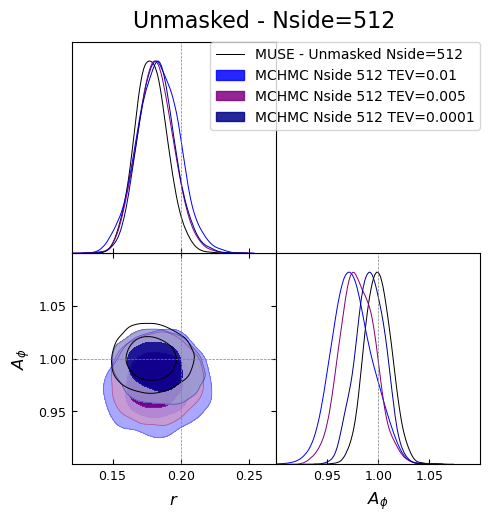

In [45]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([MUSE_chain_512, MCHMC_chain_512_01, MCHMC_chain_512_005, MCHMC_chain_512_0001], ['r', 'Aphi'],
           markers={'r':0.2, 'Aphi':1.0},
           contour_colors=['black', 'blue', 'purple', 'darkblue',], ls=['-','-', '-', '-'], 
           filled=[False, True, True, True], 
           param_limits={'r':[0.12, 0.27], 'Aphi':[0.9, 1.1]})
g.add_text('Unmasked - Nside=512', x=-0.7, y=2.1, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_triangle_512.pdf', bbox_inches='tight')

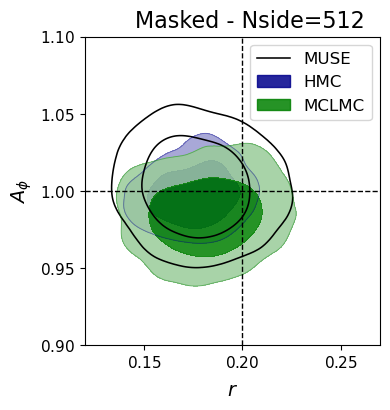

In [46]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([MUSE_chain_masked_512, HMC_chain_masked_512, MCHMC_chain_masked_512], 'r', 'Aphi', 
           colors=['black', 'darkblue', 'green'], ls=['-', '-', '-'], 
           filled=[False, True, True], lims=[0.12, 0.27, 0.9, 1.1])
g.add_legend(['MUSE', 'HMC', 'MCLMC']);
g.add_x_marker(0.2, lw=1, color='black')
g.add_y_marker(1.0, lw=1, color='black')
g.add_text('Masked - Nside=512', x=0.95, y=1.05, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/masked_512.pdf', bbox_inches='tight')

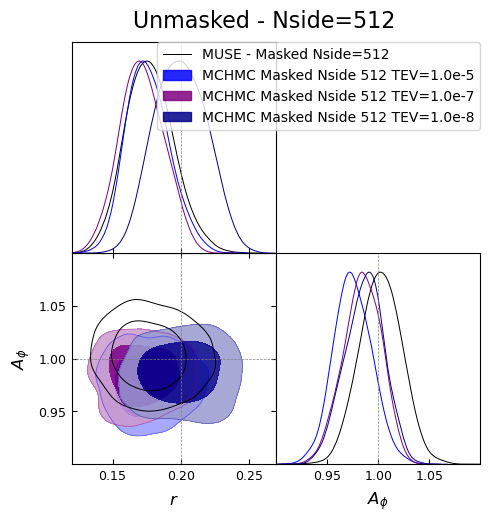

In [73]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([MUSE_chain_masked_512, MCHMC_chain_masked_512_TEV_one5, MCHMC_chain_masked_512_TEV_one7, MCHMC_chain_masked_512_TEV_one8], ['r', 'Aphi'],
           markers={'r':0.2, 'Aphi':1.0},
           contour_colors=['black', 'blue', 'purple', 'darkblue',], ls=['-','-', '-', '-'], 
           filled=[False, True, True, True], 
           param_limits={'r':[0.12, 0.27], 'Aphi':[0.9, 1.1]})
g.add_text('Unmasked - Nside=512', x=-0.7, y=2.1, fontsize=16, color='black')
#plt.savefig('/mnt/c/Users/jaime/Desktop/mchmc_lensing/unmasked_triangle_512.pdf', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/jaime/Desktop/mchmc_lensing/phiphi_EE_BB.pdf'

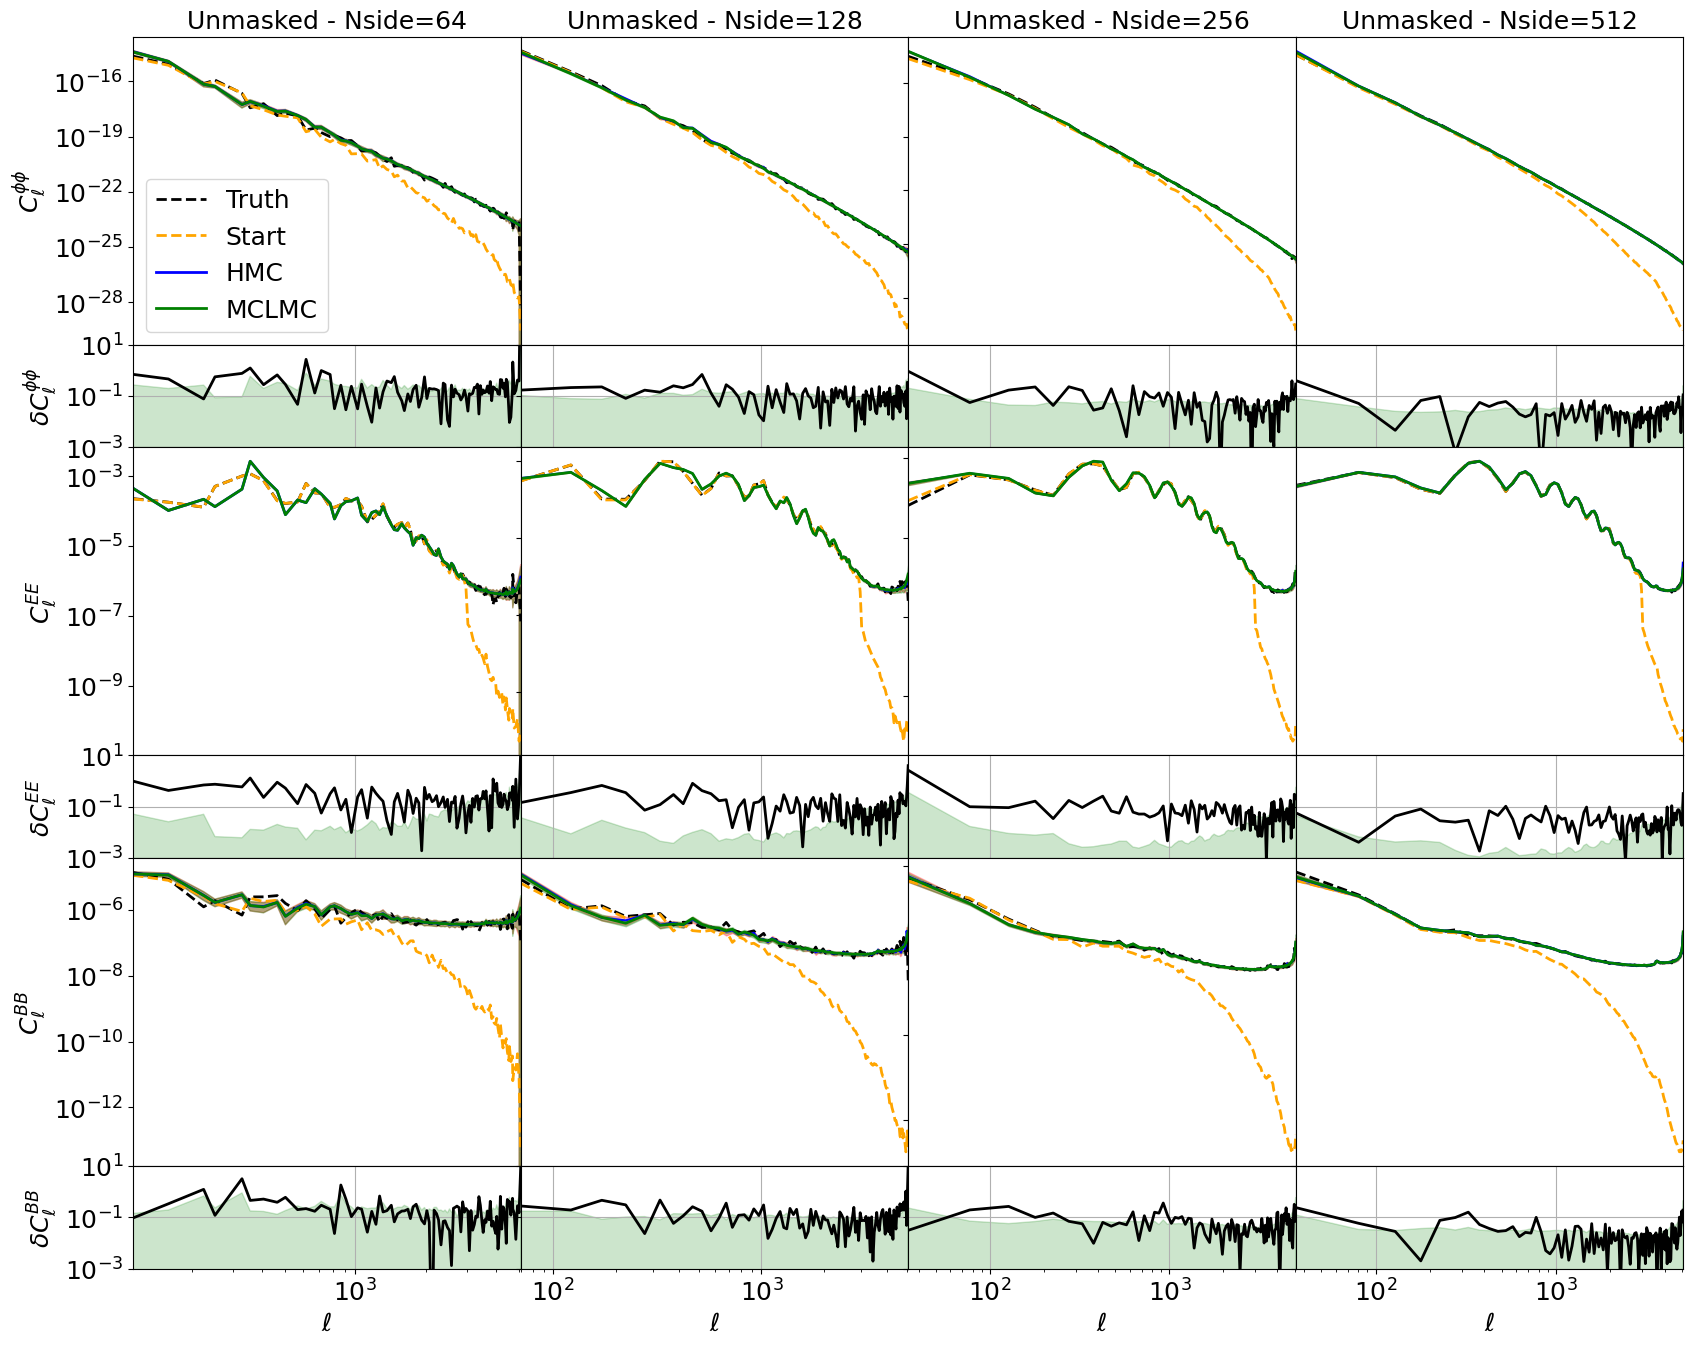

In [47]:
fig, axis = plt.subplots(6, 4, figsize=(20,16), gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

# Nside=64
## phiphi
axis[0,0].plot(true_cls_64["ells"], true_cls_64["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,0].plot(true_cls_64["ells"], true_cls_64["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,0].plot(true_cls_64["ells"], HMC_cls_64["phi_cls_m"], 'b-', lw=2, label="HMC")
axis[0,0].fill_between(true_cls_64["ells"], HMC_cls_64["phi_cls_m"]+HMC_cls_64["phi_cls_s"],
                     HMC_cls_64["phi_cls_m"]-HMC_cls_64["phi_cls_s"], color='r', alpha=.3)
axis[0,0].plot(true_cls_64["ells"], MCHMC_cls_64["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["phi_cls_m"]+MCHMC_cls_64["phi_cls_s"],
                     MCHMC_cls_64["phi_cls_m"]-MCHMC_cls_64["phi_cls_s"], color='g', alpha=.3)
axis[0,0].set_title("Unmasked - Nside=64")
axis[0,0].set_xscale('log')
axis[0,0].set_yscale('log')
axis[0,0].set_ylabel(r"$C_\ell^{\phi \phi}$")
axis[0,0].legend()
axis[0,0].set_xticks([])
axis[0,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])

axis[1,0].plot(true_cls_64["ells"], np.abs(MCHMC_cls_64["phi_cls_m"]-true_cls_64["phi_cls_true"])/true_cls_64["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["phi_cls_s"]/true_cls_64["phi_cls_true"],
                     np.zeros(len(true_cls_64["ells"])), color='g', alpha=.2)
axis[1,0].set_xscale('log')
axis[1,0].set_yscale('log')
axis[1,0].set_xticklabels([])
axis[1,0].set_ylim([1e-3, 10])
axis[1,0].set_ylabel(r"$\delta C_\ell^{\phi \phi}$")
axis[1,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])
axis[1,0].grid()

## EE
axis[2,0].plot(true_cls_64["ells"], true_cls_64["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,0].plot(true_cls_64["ells"], true_cls_64["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,0].plot(true_cls_64["ells"], HMC_cls_64["E_cls_m"], 'b-', lw=2, label="HMC")
axis[2,0].fill_between(true_cls_64["ells"], HMC_cls_64["E_cls_m"]+HMC_cls_64["E_cls_s"],
                     HMC_cls_64["E_cls_m"]-HMC_cls_64["E_cls_s"], color='r', alpha=.3)
axis[2,0].plot(true_cls_64["ells"], MCHMC_cls_64["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["E_cls_m"]+MCHMC_cls_64["E_cls_s"],
                     MCHMC_cls_64["E_cls_m"]-MCHMC_cls_64["E_cls_s"], color='g', alpha=.3)
axis[2,0].set_xscale('log')
axis[2,0].set_yscale('log')
axis[2,0].set_ylabel(r"$C_\ell^{EE}$")
axis[2,0].set_xticks([])
axis[2,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])

axis[3,0].plot(true_cls_64["ells"], np.abs(MCHMC_cls_64["E_cls_m"]-true_cls_64["E_cls_true"])/true_cls_64["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["E_cls_s"]/true_cls_64["E_cls_true"],
                     np.zeros(len(true_cls_64["ells"])), color='g', alpha=.2)
axis[3,0].set_xscale('log')
axis[3,0].set_yscale('log')
axis[3,0].set_xticklabels([])
axis[3,0].set_ylim([1e-3, 10])
axis[3,0].set_ylabel(r"$\delta C_\ell^{EE}$")
axis[3,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])
axis[3,0].grid()

## BB
axis[4,0].plot(true_cls_64["ells"], true_cls_64["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,0].plot(true_cls_64["ells"], true_cls_64["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,0].plot(true_cls_64["ells"], HMC_cls_64["B_cls_m"], 'b-', lw=2, label="HMC")
axis[4,0].fill_between(true_cls_64["ells"], HMC_cls_64["B_cls_m"]+HMC_cls_64["B_cls_s"],
                     HMC_cls_64["B_cls_m"]-HMC_cls_64["B_cls_s"], color='r', alpha=.3)
axis[4,0].plot(true_cls_64["ells"], MCHMC_cls_64["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["B_cls_m"]+MCHMC_cls_64["B_cls_s"],
                     MCHMC_cls_64["B_cls_m"]-MCHMC_cls_64["B_cls_s"], color='g', alpha=.3)
axis[4,0].set_xscale('log')
axis[4,0].set_yscale('log')
axis[4,0].set_ylabel(r"$C_\ell^{BB}$")
axis[4,0].set_xlabel(r"$\ell$")
axis[4,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])

axis[5,0].plot(true_cls_64["ells"], np.abs(MCHMC_cls_64["B_cls_m"]-true_cls_64["B_cls_true"])/true_cls_64["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["B_cls_s"]/true_cls_64["B_cls_true"],
                        np.zeros(len(true_cls_64["ells"])), color='g', alpha=.2)
axis[5,0].set_xscale('log')
axis[5,0].set_yscale('log')
axis[5,0].set_ylim([1e-3, 10])
axis[5,0].set_ylabel(r"$\delta C_\ell^{BB}$")
axis[5,0].set_xlabel(r"$\ell$")
axis[5,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])
axis[5,0].grid()

# Nside=128
# EE
axis[0,1].plot(true_cls_128["ells"], true_cls_128["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,1].plot(true_cls_128["ells"], true_cls_128["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,1].plot(true_cls_128["ells"], HMC_cls_128["phi_cls_m"], 'b-', label="HMC")
axis[0,1].fill_between(true_cls_128["ells"], HMC_cls_128["phi_cls_m"]+HMC_cls_128["phi_cls_s"],
                     HMC_cls_128["phi_cls_m"]-HMC_cls_128["phi_cls_s"], color='r', alpha=.3)
axis[0,1].plot(true_cls_128["ells"], MCHMC_cls_128["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["phi_cls_m"]+MCHMC_cls_128["phi_cls_s"],
                     MCHMC_cls_128["phi_cls_m"]-MCHMC_cls_128["phi_cls_s"], color='g', alpha=.3)
axis[0,1].set_title("Unmasked - Nside=128")
axis[0,1].set_xscale('log')
axis[0,1].set_yscale('log')
axis[0,1].set_xticks([])
axis[0,1].set_yticks([])
axis[0,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])

axis[1,1].plot(true_cls_128["ells"], np.abs(MCHMC_cls_128["phi_cls_m"]-true_cls_128["phi_cls_true"])/true_cls_128["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["phi_cls_s"]/true_cls_128["phi_cls_true"],
                     np.zeros(len(true_cls_128["ells"])), color='g', alpha=.2)
axis[1,1].set_xscale('log')
axis[1,1].set_yscale('log')
axis[1,1].set_xticklabels([])
axis[1,1].set_ylim([1e-3, 10])
axis[1,1].set_yticklabels([])
axis[1,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])
axis[1,1].grid()

# EE
axis[2,1].plot(true_cls_128["ells"], true_cls_128["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,1].plot(true_cls_128["ells"], true_cls_128["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,1].plot(true_cls_128["ells"], HMC_cls_128["E_cls_m"], 'b-', label="HMC")
axis[2,1].fill_between(true_cls_128["ells"], HMC_cls_128["E_cls_m"]+HMC_cls_128["E_cls_s"],
                     HMC_cls_128["E_cls_m"]-HMC_cls_128["E_cls_s"], color='r', alpha=.3)
axis[2,1].plot(true_cls_128["ells"], MCHMC_cls_128["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["E_cls_m"]+MCHMC_cls_128["E_cls_s"],
                     MCHMC_cls_128["E_cls_m"]-MCHMC_cls_128["E_cls_s"], color='g', alpha=.3)
axis[2,1].set_xscale('log')
axis[2,1].set_yscale('log')
axis[2,1].set_xticks([])
axis[2,1].set_yticklabels([])
axis[2,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])

axis[3,1].plot(true_cls_128["ells"], np.abs(MCHMC_cls_128["E_cls_m"]-true_cls_128["E_cls_true"])/true_cls_128["E_cls_true"], 'k-', lw=2, label="MCLMC")	
axis[3,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["E_cls_s"]/true_cls_128["E_cls_true"],
                        np.zeros(len(true_cls_128["ells"])), color='g', alpha=.2)
axis[3,1].set_xscale('log')
axis[3,1].set_yscale('log')
axis[3,1].set_xticklabels([])
axis[3,1].set_ylim([1e-3, 10])
axis[3,1].set_yticks([])
axis[3,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])
axis[3,1].grid()

# BB
axis[4,1].plot(true_cls_128["ells"], true_cls_128["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,1].plot(true_cls_128["ells"], true_cls_128["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,1].plot(true_cls_128["ells"], HMC_cls_128["B_cls_m"], 'b-', label="HMC")
axis[4,1].fill_between(true_cls_128["ells"], HMC_cls_128["B_cls_m"]+HMC_cls_128["B_cls_s"],
                     HMC_cls_128["B_cls_m"]-HMC_cls_128["B_cls_s"], color='r', alpha=.3)
axis[4,1].plot(true_cls_128["ells"], MCHMC_cls_128["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["B_cls_m"]+MCHMC_cls_128["B_cls_s"],
                     MCHMC_cls_128["B_cls_m"]-MCHMC_cls_128["B_cls_s"], color='g', alpha=.3)
axis[4,1].set_xscale('log')
axis[4,1].set_yscale('log')
axis[4,1].set_yticks([])
axis[4,1].set_xlabel(r"$\ell$")
axis[4,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])

axis[5,1].plot(true_cls_128["ells"], np.abs(MCHMC_cls_128["B_cls_m"]-true_cls_128["B_cls_true"])/true_cls_128["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["B_cls_s"]/true_cls_128["B_cls_true"],
                        np.zeros(len(true_cls_128["ells"])), color='g', alpha=.2)
axis[5,1].set_xscale('log')
axis[5,1].set_yscale('log')
axis[5,1].set_yticklabels([])
axis[5,1].set_xlabel(r"$\ell$")
axis[5,1].set_ylim([1e-3, 10])
axis[5,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])
axis[5,1].grid()

# Nside=256
## phiphi
axis[0,2].plot(true_cls_256["ells"], true_cls_256["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,2].plot(true_cls_256["ells"], true_cls_256["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,2].plot(true_cls_256["ells"], HMC_cls_256["phi_cls_m"], 'b-', label="HMC")
axis[0,2].fill_between(true_cls_256["ells"], HMC_cls_256["phi_cls_m"]+HMC_cls_256["phi_cls_s"],
                     HMC_cls_256["phi_cls_m"]-HMC_cls_256["phi_cls_s"], color='r', alpha=.3)
axis[0,2].plot(true_cls_256["ells"], MCHMC_cls_256["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["phi_cls_m"]+MCHMC_cls_256["phi_cls_s"],
                     MCHMC_cls_256["phi_cls_m"]-MCHMC_cls_256["phi_cls_s"], color='g', alpha=.3)
axis[0,2].set_title("Unmasked - Nside=256")
axis[0,2].set_xscale('log')
axis[0,2].set_yscale('log')
axis[0,2].set_xticks([])
axis[0,2].set_yticklabels([])
axis[0,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])

axis[1,2].plot(true_cls_256["ells"], np.abs(MCHMC_cls_256["phi_cls_m"]-true_cls_256["phi_cls_true"])/true_cls_256["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["phi_cls_s"]/true_cls_256["phi_cls_true"],
                        np.zeros(len(true_cls_256["ells"])), color='g', alpha=.2)
axis[1,2].set_xscale('log')	
axis[1,2].set_yscale('log')
axis[1,2].set_xticklabels([])
axis[1,2].set_ylim([1e-3, 10])
axis[1,2].set_yticks([])
axis[1,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])
axis[1,2].grid()

## EE
axis[2,2].plot(true_cls_256["ells"], true_cls_256["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,2].plot(true_cls_256["ells"], true_cls_256["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,2].plot(true_cls_256["ells"], HMC_cls_256["E_cls_m"], 'b-', label="HMC")
axis[2,2].fill_between(true_cls_256["ells"], HMC_cls_256["E_cls_m"]+HMC_cls_256["E_cls_s"],
                     HMC_cls_256["E_cls_m"]-HMC_cls_256["E_cls_s"], color='r', alpha=.3)
axis[2,2].plot(true_cls_256["ells"], MCHMC_cls_256["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["E_cls_m"]+MCHMC_cls_256["E_cls_s"],
                     MCHMC_cls_256["E_cls_m"]-MCHMC_cls_256["E_cls_s"], color='g', alpha=.3)
axis[2,2].set_xscale('log')
axis[2,2].set_yscale('log')
axis[2,2].set_xticks([])
axis[2,2].set_yticklabels([])
axis[2,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])

axis[3,2].plot(true_cls_256["ells"], np.abs(MCHMC_cls_256["E_cls_m"]-true_cls_256["E_cls_true"])/true_cls_256["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["E_cls_s"]/true_cls_256["E_cls_true"],
                        np.zeros(len(true_cls_256["ells"])), color='g', alpha=.2)	
axis[3,2].set_xscale('log')
axis[3,2].set_yscale('log')
axis[3,2].set_xticklabels([])
axis[3,2].set_ylim([1e-3, 10])
axis[3,2].set_yticks([])
axis[3,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])
axis[3,2].grid()

## BB
axis[4,2].plot(true_cls_256["ells"], true_cls_256["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,2].plot(true_cls_256["ells"], true_cls_256["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,2].plot(true_cls_256["ells"], HMC_cls_256["B_cls_m"], 'b-', label="HMC")
axis[4,2].fill_between(true_cls_256["ells"], HMC_cls_256["B_cls_m"]+HMC_cls_256["B_cls_s"],
                     HMC_cls_256["B_cls_m"]-HMC_cls_256["B_cls_s"], color='r', alpha=.3)
axis[4,2].plot(true_cls_256["ells"], MCHMC_cls_256["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["B_cls_m"]+MCHMC_cls_256["B_cls_s"],
                     MCHMC_cls_256["B_cls_m"]-MCHMC_cls_256["B_cls_s"], color='g', alpha=.3)
axis[4,2].set_xscale('log')
axis[4,2].set_yscale('log')
axis[4,2].set_yticklabels([])
axis[4,2].set_xlabel(r"$\ell$")
axis[4,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])

axis[5,2].plot(true_cls_256["ells"], np.abs(MCHMC_cls_256["B_cls_m"]-true_cls_256["B_cls_true"])/true_cls_256["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["B_cls_s"]/true_cls_256["B_cls_true"],
                        np.zeros(len(true_cls_256["ells"])), color='g', alpha=.2)
axis[5,2].set_xscale('log')
axis[5,2].set_yscale('log')
axis[5,2].set_yticklabels([])
axis[5,2].set_xlabel(r"$\ell$")
axis[5,2].set_ylim([1e-3, 10])
axis[5,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])
axis[5,2].grid()

# Nside=512
## phiphi
axis[0,3].plot(true_cls_512["ells"], true_cls_512["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,3].plot(true_cls_512["ells"], true_cls_512["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,3].plot(true_cls_512["ells"], HMC_cls_512["phi_cls_m"], 'b-', lw=2, label="HMC")
axis[0,3].fill_between(true_cls_512["ells"], HMC_cls_512["phi_cls_m"]+HMC_cls_512["phi_cls_s"],
                     HMC_cls_512["phi_cls_m"]-HMC_cls_512["phi_cls_s"], color='r', alpha=.3)
axis[0,3].plot(true_cls_512["ells"], MCHMC_cls_512["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["phi_cls_m"]+MCHMC_cls_512["phi_cls_s"],
                     MCHMC_cls_512["phi_cls_m"]-MCHMC_cls_512["phi_cls_s"], color='g', alpha=.3)
axis[0,3].set_title("Unmasked - Nside=512")
axis[0,3].set_xscale('log')
axis[0,3].set_yscale('log')
axis[0,3].set_xticks([])
axis[0,3].set_yticks([])
axis[0,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])

axis[1,3].plot(true_cls_512["ells"], np.abs(MCHMC_cls_512["phi_cls_m"]-true_cls_512["phi_cls_true"])/true_cls_512["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["phi_cls_s"]/true_cls_512["phi_cls_true"],
                     np.zeros(len(true_cls_512["ells"])), color='g', alpha=.2)
axis[1,3].set_xscale('log')
axis[1,3].set_yscale('log')
axis[1,3].set_xticklabels([])
axis[1,3].set_ylim([1e-3, 10])
axis[1,3].set_yticklabels([])
axis[1,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])  
axis[1,3].grid()

## EE
axis[2,3].plot(true_cls_512["ells"], true_cls_512["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,3].plot(true_cls_512["ells"], true_cls_512["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,3].plot(true_cls_512["ells"], HMC_cls_512["E_cls_m"], 'b-', lw=2, label="HMC")
axis[2,3].fill_between(true_cls_512["ells"], HMC_cls_512["E_cls_m"]+HMC_cls_512["E_cls_s"],
                     HMC_cls_512["E_cls_m"]-HMC_cls_512["E_cls_s"], color='r', alpha=.3)
axis[2,3].plot(true_cls_512["ells"], MCHMC_cls_512["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["E_cls_m"]+MCHMC_cls_512["E_cls_s"],
                     MCHMC_cls_512["E_cls_m"]-MCHMC_cls_512["E_cls_s"], color='g', alpha=.3)
axis[2,3].set_xscale('log')
axis[2,3].set_yscale('log')
axis[2,3].set_xticks([])
axis[2,3].set_yticks([])
axis[2,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])

axis[3,3].plot(true_cls_512["ells"], np.abs(MCHMC_cls_512["E_cls_m"]-true_cls_512["E_cls_true"])/true_cls_512["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["E_cls_s"]/true_cls_512["E_cls_true"],
                        np.zeros(len(true_cls_512["ells"])), color='g', alpha=.2)
axis[3,3].set_xscale('log')
axis[3,3].set_yscale('log')
axis[3,3].set_xticklabels([])
axis[3,3].set_ylim([1e-3, 10])
axis[3,3].set_yticklabels([])
axis[3,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])
axis[3,3].grid()

## BB
axis[4,3].plot(true_cls_512["ells"], true_cls_512["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,3].plot(true_cls_512["ells"], true_cls_512["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,3].plot(true_cls_512["ells"], HMC_cls_512["B_cls_m"], 'b-', lw=2, label="HMC")
axis[4,3].fill_between(true_cls_512["ells"], HMC_cls_512["B_cls_m"]+HMC_cls_512["B_cls_s"],
                     HMC_cls_512["B_cls_m"]-HMC_cls_512["B_cls_s"], color='r', alpha=.3)
axis[4,3].plot(true_cls_512["ells"], MCHMC_cls_512["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["B_cls_m"]+MCHMC_cls_512["B_cls_s"],
                     MCHMC_cls_512["B_cls_m"]-MCHMC_cls_512["B_cls_s"], color='g', alpha=.3)
axis[4,3].set_xscale('log')
axis[4,3].set_yscale('log')
axis[4,3].set_yticks([])
axis[4,3].set_xlabel(r"$\ell$")
axis[4,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])

axis[5,3].plot(true_cls_512["ells"], np.abs(MCHMC_cls_512["B_cls_m"]-true_cls_512["B_cls_true"])/true_cls_512["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["B_cls_s"]/true_cls_512["B_cls_true"],
                        np.zeros(len(true_cls_512["ells"])), color='g', alpha=.2)
axis[5,3].set_xscale('log')
axis[5,3].set_yscale('log')
axis[5,3].set_yticklabels([])
axis[5,3].set_xlabel(r"$\ell$")
axis[5,3].set_ylim([1e-3, 10])
axis[5,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])
axis[5,3].grid()

plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/phiphi_EE_BB.pdf", bbox_inches='tight')
plt.show()


In [ ]:
fig, axis = plt.subplots(6, 4, figsize=(20,16), gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

# Nside=64
## phiphi
axis[0,0].plot(true_cls_64["ells"], true_cls_64["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,0].plot(true_cls_64["ells"], true_cls_64["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,0].plot(true_cls_64["ells"], HMC_cls_64["phi_cls_m"], 'b-', lw=2, label="HMC")
axis[0,0].fill_between(true_cls_64["ells"], HMC_cls_64["phi_cls_m"]+HMC_cls_64["phi_cls_s"],
                     HMC_cls_64["phi_cls_m"]-HMC_cls_64["phi_cls_s"], color='r', alpha=.3)
axis[0,0].plot(true_cls_64["ells"], MCHMC_cls_64["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["phi_cls_m"]+MCHMC_cls_64["phi_cls_s"],
                     MCHMC_cls_64["phi_cls_m"]-MCHMC_cls_64["phi_cls_s"], color='g', alpha=.3)
axis[0,0].set_title("Unmasked - Nside=64")
axis[0,0].set_xscale('log')
axis[0,0].set_yscale('log')
axis[0,0].set_ylabel(r"$C_\ell^{\phi \phi}$")
axis[0,0].legend()
axis[0,0].set_xticks([])
axis[0,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])

axis[1,0].plot(true_cls_64["ells"], np.abs(HMC_cls_64["phi_cls_m"]-true_cls_64["phi_cls_true"])/true_cls_64["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,0].fill_between(true_cls_64["ells"], HMC_cls_64["phi_cls_s"]/true_cls_64["phi_cls_true"],
                     np.zeros(len(true_cls_64["ells"])), color='b', alpha=.2)
axis[1,0].set_xscale('log')
axis[1,0].set_yscale('log')
axis[1,0].set_xticklabels([])
axis[1,0].set_ylim([1e-3, 10])
axis[1,0].set_ylabel(r"$\delta C_\ell^{\phi \phi}$")
axis[1,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])
axis[1,0].grid()

## EE
axis[2,0].plot(true_cls_64["ells"], true_cls_64["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,0].plot(true_cls_64["ells"], true_cls_64["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,0].plot(true_cls_64["ells"], HMC_cls_64["E_cls_m"], 'b-', lw=2, label="HMC")
axis[2,0].fill_between(true_cls_64["ells"], HMC_cls_64["E_cls_m"]+HMC_cls_64["E_cls_s"],
                     HMC_cls_64["E_cls_m"]-HMC_cls_64["E_cls_s"], color='r', alpha=.3)
axis[2,0].plot(true_cls_64["ells"], MCHMC_cls_64["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["E_cls_m"]+MCHMC_cls_64["E_cls_s"],
                     MCHMC_cls_64["E_cls_m"]-MCHMC_cls_64["E_cls_s"], color='g', alpha=.3)
axis[2,0].set_xscale('log')
axis[2,0].set_yscale('log')
axis[2,0].set_ylabel(r"$C_\ell^{EE}$")
axis[2,0].set_xticks([])
axis[2,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])

axis[3,0].plot(true_cls_64["ells"], np.abs(HMC_cls_64["E_cls_m"]-true_cls_64["E_cls_true"])/true_cls_64["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,0].fill_between(true_cls_64["ells"], HMC_cls_64["E_cls_s"]/true_cls_64["E_cls_true"],
                     np.zeros(len(true_cls_64["ells"])), color='b', alpha=.2)
axis[3,0].set_xscale('log')
axis[3,0].set_yscale('log')
axis[3,0].set_xticklabels([])
axis[3,0].set_ylim([1e-3, 10])
axis[3,0].set_ylabel(r"$\delta C_\ell^{EE}$")
axis[3,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])
axis[3,0].grid()

## BB
axis[4,0].plot(true_cls_64["ells"], true_cls_64["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,0].plot(true_cls_64["ells"], true_cls_64["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,0].plot(true_cls_64["ells"], HMC_cls_64["B_cls_m"], 'b-', lw=2, label="HMC")
axis[4,0].fill_between(true_cls_64["ells"], HMC_cls_64["B_cls_m"]+HMC_cls_64["B_cls_s"],
                     HMC_cls_64["B_cls_m"]-HMC_cls_64["B_cls_s"], color='r', alpha=.3)
axis[4,0].plot(true_cls_64["ells"], MCHMC_cls_64["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,0].fill_between(true_cls_64["ells"], MCHMC_cls_64["B_cls_m"]+MCHMC_cls_64["B_cls_s"],
                     MCHMC_cls_64["B_cls_m"]-MCHMC_cls_64["B_cls_s"], color='g', alpha=.3)
axis[4,0].set_xscale('log')
axis[4,0].set_yscale('log')
axis[4,0].set_ylabel(r"$C_\ell^{BB}$")
axis[4,0].set_xlabel(r"$\ell$")
axis[4,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])

axis[5,0].plot(true_cls_64["ells"], np.abs(HMC_cls_64["B_cls_m"]-true_cls_64["B_cls_true"])/true_cls_64["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,0].fill_between(true_cls_64["ells"], HMC_cls_64["B_cls_s"]/true_cls_64["B_cls_true"],
                        np.zeros(len(true_cls_64["ells"])), color='b', alpha=.2)
axis[5,0].set_xscale('log')
axis[5,0].set_yscale('log')
axis[5,0].set_ylim([1e-3, 10])
axis[5,0].set_ylabel(r"$\delta C_\ell^{BB}$")
axis[5,0].set_xlabel(r"$\ell$")
axis[5,0].set_xlim(true_cls_64["ells"][0], true_cls_64["ells"][-1])
axis[5,0].grid()

# Nside=128
# EE
axis[0,1].plot(true_cls_128["ells"], true_cls_128["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,1].plot(true_cls_128["ells"], true_cls_128["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,1].plot(true_cls_128["ells"], HMC_cls_128["phi_cls_m"], 'b-', label="HMC")
axis[0,1].fill_between(true_cls_128["ells"], HMC_cls_128["phi_cls_m"]+HMC_cls_128["phi_cls_s"],
                     HMC_cls_128["phi_cls_m"]-HMC_cls_128["phi_cls_s"], color='r', alpha=.3)
axis[0,1].plot(true_cls_128["ells"], MCHMC_cls_128["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["phi_cls_m"]+MCHMC_cls_128["phi_cls_s"],
                     MCHMC_cls_128["phi_cls_m"]-MCHMC_cls_128["phi_cls_s"], color='g', alpha=.3)
axis[0,1].set_title("Unmasked - Nside=128")
axis[0,1].set_xscale('log')
axis[0,1].set_yscale('log')
axis[0,1].set_xticks([])
axis[0,1].set_yticks([])
axis[0,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])

axis[1,1].plot(true_cls_128["ells"], np.abs(HMC_cls_128["phi_cls_m"]-true_cls_128["phi_cls_true"])/true_cls_128["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,1].fill_between(true_cls_128["ells"], HMC_cls_128["phi_cls_s"]/true_cls_128["phi_cls_true"],
                     np.zeros(len(true_cls_128["ells"])), color='b', alpha=.2)
axis[1,1].set_xscale('log')
axis[1,1].set_yscale('log')
axis[1,1].set_xticklabels([])
axis[1,1].set_ylim([1e-3, 10])
axis[1,1].set_yticklabels([])
axis[1,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])
axis[1,1].grid()

# EE
axis[2,1].plot(true_cls_128["ells"], true_cls_128["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,1].plot(true_cls_128["ells"], true_cls_128["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,1].plot(true_cls_128["ells"], HMC_cls_128["E_cls_m"], 'b-', label="HMC")
axis[2,1].fill_between(true_cls_128["ells"], HMC_cls_128["E_cls_m"]+HMC_cls_128["E_cls_s"],
                     HMC_cls_128["E_cls_m"]-HMC_cls_128["E_cls_s"], color='r', alpha=.3)
axis[2,1].plot(true_cls_128["ells"], MCHMC_cls_128["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["E_cls_m"]+MCHMC_cls_128["E_cls_s"],
                     MCHMC_cls_128["E_cls_m"]-MCHMC_cls_128["E_cls_s"], color='g', alpha=.3)
axis[2,1].set_xscale('log')
axis[2,1].set_yscale('log')
axis[2,1].set_xticks([])
axis[2,1].set_yticklabels([])
axis[2,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])

axis[3,1].plot(true_cls_128["ells"], np.abs(HMC_cls_128["E_cls_m"]-true_cls_128["E_cls_true"])/true_cls_128["E_cls_true"], 'k-', lw=2, label="MCLMC")	
axis[3,1].fill_between(true_cls_128["ells"], HMC_cls_128["E_cls_s"]/true_cls_128["E_cls_true"],
                        np.zeros(len(true_cls_128["ells"])), color='b', alpha=.2)
axis[3,1].set_xscale('log')
axis[3,1].set_yscale('log')
axis[3,1].set_xticklabels([])
axis[3,1].set_ylim([1e-3, 10])
axis[3,1].set_yticks([])
axis[3,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])
axis[3,1].grid()

# BB
axis[4,1].plot(true_cls_128["ells"], true_cls_128["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,1].plot(true_cls_128["ells"], true_cls_128["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,1].plot(true_cls_128["ells"], HMC_cls_128["B_cls_m"], 'b-', label="HMC")
axis[4,1].fill_between(true_cls_128["ells"], HMC_cls_128["B_cls_m"]+HMC_cls_128["B_cls_s"],
                     HMC_cls_128["B_cls_m"]-HMC_cls_128["B_cls_s"], color='r', alpha=.3)
axis[4,1].plot(true_cls_128["ells"], MCHMC_cls_128["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,1].fill_between(true_cls_128["ells"], MCHMC_cls_128["B_cls_m"]+MCHMC_cls_128["B_cls_s"],
                     MCHMC_cls_128["B_cls_m"]-MCHMC_cls_128["B_cls_s"], color='g', alpha=.3)
axis[4,1].set_xscale('log')
axis[4,1].set_yscale('log')
axis[4,1].set_yticks([])
axis[4,1].set_xlabel(r"$\ell$")
axis[4,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])

axis[5,1].plot(true_cls_128["ells"], np.abs(HMC_cls_128["B_cls_m"]-true_cls_128["B_cls_true"])/true_cls_128["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,1].fill_between(true_cls_128["ells"], HMC_cls_128["B_cls_s"]/true_cls_128["B_cls_true"],
                        np.zeros(len(true_cls_128["ells"])), color='b', alpha=.2)
axis[5,1].set_xscale('log')
axis[5,1].set_yscale('log')
axis[5,1].set_yticklabels([])
axis[5,1].set_xlabel(r"$\ell$")
axis[5,1].set_ylim([1e-3, 10])
axis[5,1].set_xlim(true_cls_128["ells"][0], true_cls_128["ells"][-1])
axis[5,1].grid()

# Nside=256
## phiphi
axis[0,2].plot(true_cls_256["ells"], true_cls_256["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,2].plot(true_cls_256["ells"], true_cls_256["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,2].plot(true_cls_256["ells"], HMC_cls_256["phi_cls_m"], 'b-', label="HMC")
axis[0,2].fill_between(true_cls_256["ells"], HMC_cls_256["phi_cls_m"]+HMC_cls_256["phi_cls_s"],
                     HMC_cls_256["phi_cls_m"]-HMC_cls_256["phi_cls_s"], color='r', alpha=.3)
axis[0,2].plot(true_cls_256["ells"], MCHMC_cls_256["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["phi_cls_m"]+MCHMC_cls_256["phi_cls_s"],
                     MCHMC_cls_256["phi_cls_m"]-MCHMC_cls_256["phi_cls_s"], color='g', alpha=.3)
axis[0,2].set_title("Unmasked - Nside=256")
axis[0,2].set_xscale('log')
axis[0,2].set_yscale('log')
axis[0,2].set_xticks([])
axis[0,2].set_yticklabels([])
axis[0,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])

axis[1,2].plot(true_cls_256["ells"], np.abs(HMC_cls_256["phi_cls_m"]-true_cls_256["phi_cls_true"])/true_cls_256["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,2].fill_between(true_cls_256["ells"], HMC_cls_256["phi_cls_s"]/true_cls_256["phi_cls_true"],
                        np.zeros(len(true_cls_256["ells"])), color='b', alpha=.2)
axis[1,2].set_xscale('log')	
axis[1,2].set_yscale('log')
axis[1,2].set_xticklabels([])
axis[1,2].set_ylim([1e-3, 10])
axis[1,2].set_yticks([])
axis[1,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])
axis[1,2].grid()

## EE
axis[2,2].plot(true_cls_256["ells"], true_cls_256["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,2].plot(true_cls_256["ells"], true_cls_256["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,2].plot(true_cls_256["ells"], HMC_cls_256["E_cls_m"], 'b-', label="HMC")
axis[2,2].fill_between(true_cls_256["ells"], HMC_cls_256["E_cls_m"]+HMC_cls_256["E_cls_s"],
                     HMC_cls_256["E_cls_m"]-HMC_cls_256["E_cls_s"], color='r', alpha=.3)
axis[2,2].plot(true_cls_256["ells"], MCHMC_cls_256["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["E_cls_m"]+MCHMC_cls_256["E_cls_s"],
                     MCHMC_cls_256["E_cls_m"]-MCHMC_cls_256["E_cls_s"], color='g', alpha=.3)
axis[2,2].set_xscale('log')
axis[2,2].set_yscale('log')
axis[2,2].set_xticks([])
axis[2,2].set_yticklabels([])
axis[2,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])

axis[3,2].plot(true_cls_256["ells"], np.abs(HMC_cls_256["E_cls_m"]-true_cls_256["E_cls_true"])/true_cls_256["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,2].fill_between(true_cls_256["ells"], HMC_cls_256["E_cls_s"]/true_cls_256["E_cls_true"],
                        np.zeros(len(true_cls_256["ells"])), color='b', alpha=.2)	
axis[3,2].set_xscale('log')
axis[3,2].set_yscale('log')
axis[3,2].set_xticklabels([])
axis[3,2].set_ylim([1e-3, 10])
axis[3,2].set_yticks([])
axis[3,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])
axis[3,2].grid()

## BB
axis[4,2].plot(true_cls_256["ells"], true_cls_256["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,2].plot(true_cls_256["ells"], true_cls_256["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,2].plot(true_cls_256["ells"], HMC_cls_256["B_cls_m"], 'b-', label="HMC")
axis[4,2].fill_between(true_cls_256["ells"], HMC_cls_256["B_cls_m"]+HMC_cls_256["B_cls_s"],
                     HMC_cls_256["B_cls_m"]-HMC_cls_256["B_cls_s"], color='r', alpha=.3)
axis[4,2].plot(true_cls_256["ells"], MCHMC_cls_256["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,2].fill_between(true_cls_256["ells"], MCHMC_cls_256["B_cls_m"]+MCHMC_cls_256["B_cls_s"],
                     MCHMC_cls_256["B_cls_m"]-MCHMC_cls_256["B_cls_s"], color='g', alpha=.3)
axis[4,2].set_xscale('log')
axis[4,2].set_yscale('log')
axis[4,2].set_yticklabels([])
axis[4,2].set_xlabel(r"$\ell$")
axis[4,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])

axis[5,2].plot(true_cls_256["ells"], np.abs(HMC_cls_256["B_cls_m"]-true_cls_256["B_cls_true"])/true_cls_256["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,2].fill_between(true_cls_256["ells"], HMC_cls_256["B_cls_s"]/true_cls_256["B_cls_true"],
                        np.zeros(len(true_cls_256["ells"])), color='b', alpha=.2)
axis[5,2].set_xscale('log')
axis[5,2].set_yscale('log')
axis[5,2].set_yticklabels([])
axis[5,2].set_xlabel(r"$\ell$")
axis[5,2].set_ylim([1e-3, 10])
axis[5,2].set_xlim(true_cls_256["ells"][0], true_cls_256["ells"][-1])
axis[5,2].grid()

# Nside=512
## phiphi
axis[0,3].plot(true_cls_512["ells"], true_cls_512["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0,3].plot(true_cls_512["ells"], true_cls_512["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0,3].plot(true_cls_512["ells"], HMC_cls_512["phi_cls_m"], 'b-', lw=2, label="HMC")
axis[0,3].fill_between(true_cls_512["ells"], HMC_cls_512["phi_cls_m"]+HMC_cls_512["phi_cls_s"],
                     HMC_cls_512["phi_cls_m"]-HMC_cls_512["phi_cls_s"], color='r', alpha=.3)
axis[0,3].plot(true_cls_512["ells"], MCHMC_cls_512["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["phi_cls_m"]+MCHMC_cls_512["phi_cls_s"],
                     MCHMC_cls_512["phi_cls_m"]-MCHMC_cls_512["phi_cls_s"], color='g', alpha=.3)
axis[0,3].set_title("Unmasked - Nside=512")
axis[0,3].set_xscale('log')
axis[0,3].set_yscale('log')
axis[0,3].set_xticks([])
axis[0,3].set_yticks([])
axis[0,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])

axis[1,3].plot(true_cls_512["ells"], np.abs(HMC_cls_512["phi_cls_m"]-true_cls_512["phi_cls_true"])/true_cls_512["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1,3].fill_between(true_cls_512["ells"], HMC_cls_512["phi_cls_s"]/true_cls_512["phi_cls_true"],
                     np.zeros(len(true_cls_512["ells"])), color='b', alpha=.2)
axis[1,3].set_xscale('log')
axis[1,3].set_yscale('log')
axis[1,3].set_xticklabels([])
axis[1,3].set_ylim([1e-3, 10])
axis[1,3].set_yticklabels([])
axis[1,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])  
axis[1,3].grid()

## EE
axis[2,3].plot(true_cls_512["ells"], true_cls_512["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2,3].plot(true_cls_512["ells"], true_cls_512["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2,3].plot(true_cls_512["ells"], HMC_cls_512["E_cls_m"], 'b-', lw=2, label="HMC")
axis[2,3].fill_between(true_cls_512["ells"], HMC_cls_512["E_cls_m"]+HMC_cls_512["E_cls_s"],
                     HMC_cls_512["E_cls_m"]-HMC_cls_512["E_cls_s"], color='r', alpha=.3)
axis[2,3].plot(true_cls_512["ells"], MCHMC_cls_512["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["E_cls_m"]+MCHMC_cls_512["E_cls_s"],
                     MCHMC_cls_512["E_cls_m"]-MCHMC_cls_512["E_cls_s"], color='g', alpha=.3)
axis[2,3].set_xscale('log')
axis[2,3].set_yscale('log')
axis[2,3].set_xticks([])
axis[2,3].set_yticks([])
axis[2,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])

axis[3,3].plot(true_cls_512["ells"], np.abs(HMC_cls_512["E_cls_m"]-true_cls_512["E_cls_true"])/true_cls_512["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3,3].fill_between(true_cls_512["ells"], HMC_cls_512["E_cls_s"]/true_cls_512["E_cls_true"],
                        np.zeros(len(true_cls_512["ells"])), color='b', alpha=.2)
axis[3,3].set_xscale('log')
axis[3,3].set_yscale('log')
axis[3,3].set_xticklabels([])
axis[3,3].set_ylim([1e-3, 10])
axis[3,3].set_yticklabels([])
axis[3,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])
axis[3,3].grid()

## BB
axis[4,3].plot(true_cls_512["ells"], true_cls_512["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4,3].plot(true_cls_512["ells"], true_cls_512["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4,3].plot(true_cls_512["ells"], HMC_cls_512["B_cls_m"], 'b-', lw=2, label="HMC")
axis[4,3].fill_between(true_cls_512["ells"], HMC_cls_512["B_cls_m"]+HMC_cls_512["B_cls_s"],
                     HMC_cls_512["B_cls_m"]-HMC_cls_512["B_cls_s"], color='r', alpha=.3)
axis[4,3].plot(true_cls_512["ells"], MCHMC_cls_512["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4,3].fill_between(true_cls_512["ells"], MCHMC_cls_512["B_cls_m"]+MCHMC_cls_512["B_cls_s"],
                     MCHMC_cls_512["B_cls_m"]-MCHMC_cls_512["B_cls_s"], color='g', alpha=.3)
axis[4,3].set_xscale('log')
axis[4,3].set_yscale('log')
axis[4,3].set_yticks([])
axis[4,3].set_xlabel(r"$\ell$")
axis[4,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])

axis[5,3].plot(true_cls_512["ells"], np.abs(HMC_cls_512["B_cls_m"]-true_cls_512["B_cls_true"])/true_cls_512["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5,3].fill_between(true_cls_512["ells"], HMC_cls_512["B_cls_s"]/true_cls_512["B_cls_true"],
                        np.zeros(len(true_cls_512["ells"])), color='b', alpha=.2)
axis[5,3].set_xscale('log')
axis[5,3].set_yscale('log')
axis[5,3].set_yticklabels([])
axis[5,3].set_xlabel(r"$\ell$")
axis[5,3].set_ylim([1e-3, 10])
axis[5,3].set_xlim(true_cls_512["ells"][0], true_cls_512["ells"][-1])
axis[5,3].grid()

plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/phiphi_EE_BB.pdf", bbox_inches='tight')
plt.show()


In [ ]:
fig, axis = plt.subplots(6, figsize=(5,12), gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1]})
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

# phi-phi
axis[0].plot(true_cls_masked_512["ells"], true_cls_masked_512["phi_cls_true"], 'k--', lw=2, label="Truth")
axis[0].plot(true_cls_masked_512["ells"], true_cls_masked_512["phi_cls_start"], '--', color="orange", lw=2, label="Start")
axis[0].plot(true_cls_masked_512["ells"], HMC_cls_masked_512["phi_cls_m"], 'b-', lw=2, label="HMC")
axis[0].fill_between(true_cls_masked_512["ells"], HMC_cls_masked_512["phi_cls_m"]+HMC_cls_masked_512["phi_cls_s"],
                     HMC_cls_masked_512["phi_cls_m"]-HMC_cls_masked_512["phi_cls_s"], color='b', alpha=.3)
axis[0].plot(true_cls_masked_512["ells"], MCHMC_cls_masked_512["phi_cls_m"], 'g-', lw=2, label="MCLMC")
axis[0].fill_between(true_cls_masked_512["ells"], MCHMC_cls_masked_512["phi_cls_m"]+MCHMC_cls_masked_512["phi_cls_s"],
                     MCHMC_cls_masked_512["phi_cls_m"]-MCHMC_cls_masked_512["phi_cls_s"], color='g', alpha=.3)
axis[0].set_title("Masked - Nside=512")
axis[0].set_xscale('log')
axis[0].set_yscale('log')
axis[0].set_ylabel(r"$C_\ell^{\phi \phi}$")
axis[0].legend()
axis[0].set_xticks([])
axis[0].set_xlim(true_cls_masked_512["ells"][0], true_cls_masked_512["ells"][-1])

axis[1].plot(true_cls_masked_512["ells"], np.abs(MCHMC_cls_masked_512["phi_cls_m"]-true_cls_masked_512["phi_cls_true"])/true_cls_masked_512["phi_cls_true"], 'k-', lw=2, label="MCLMC")
axis[1].fill_between(true_cls_masked_512["ells"], MCHMC_cls_masked_512["phi_cls_s"]/true_cls_masked_512["phi_cls_true"],
                     np.zeros(len(true_cls_masked_512["ells"])), color='g', alpha=.2)
axis[1].set_xscale('log')
axis[1].set_yscale('log')
axis[1].set_xticklabels([])
axis[1].set_ylim([1e-3, 1])
axis[1].set_ylabel(r"$\delta C_\ell^{\phi \phi}$")
axis[1].set_xlim(true_cls_masked_512["ells"][0], true_cls_masked_512["ells"][-1])
axis[1].grid()

# EE
axis[2].plot(true_cls_masked_512["ells"], true_cls_masked_512["E_cls_true"], 'k--', lw=2, label="Trurth")
axis[2].plot(true_cls_masked_512["ells"], true_cls_masked_512["E_cls_start"], '--', color="orange", lw=2, label="Start")
axis[2].plot(true_cls_masked_512["ells"], HMC_cls_masked_512["E_cls_m"], 'b-', lw=2, label="MCLMC")
axis[2].fill_between(true_cls_masked_512["ells"], HMC_cls_masked_512["E_cls_m"]+HMC_cls_masked_512["E_cls_s"],
                     HMC_cls_masked_512["E_cls_m"]-HMC_cls_masked_512["E_cls_s"], color='b', alpha=.3)
axis[2].plot(true_cls_masked_512["ells"], MCHMC_cls_masked_512["E_cls_m"], 'g-', lw=2, label="MCLMC")
axis[2].fill_between(true_cls_masked_512["ells"], MCHMC_cls_masked_512["E_cls_m"]+MCHMC_cls_masked_512["E_cls_s"],
                     MCHMC_cls_masked_512["E_cls_m"]-MCHMC_cls_masked_512["E_cls_s"], color='g', alpha=.3)
axis[2].set_xscale('log')
axis[2].set_yscale('log')
axis[2].set_ylabel(r"$C_\ell^{EE}$")
axis[2].set_xticks([])
axis[2].set_xlim(true_cls_masked_512["ells"][0], true_cls_masked_512["ells"][-1])

axis[3].plot(true_cls_masked_512["ells"], np.abs(MCHMC_cls_masked_512["E_cls_m"]-true_cls_masked_512["E_cls_true"])/true_cls_masked_512["E_cls_true"], 'k-', lw=2, label="MCLMC")
axis[3].fill_between(true_cls_masked_512["ells"], MCHMC_cls_masked_512["E_cls_s"]/true_cls_masked_512["E_cls_true"],
                     np.zeros(len(true_cls_masked_512["ells"])), color='g', alpha=.2)
axis[3].set_xscale('log')
axis[3].set_yscale('log')
axis[3].set_xticklabels([])
axis[3].set_ylim([1e-3, 1])
axis[3].set_ylabel(r"$\delta C_\ell^{EE}$")
axis[3].set_xlim(true_cls_masked_512["ells"][0], true_cls_masked_512["ells"][-1])
axis[3].grid()

# BB
axis[4].plot(true_cls_masked_512["ells"], true_cls_masked_512["B_cls_true"], 'k--', lw=2, label="Trurth")
axis[4].plot(true_cls_masked_512["ells"], true_cls_masked_512["B_cls_start"], '--', color="orange", lw=2, label="Start")
axis[4].plot(true_cls_masked_512["ells"], HMC_cls_masked_512["B_cls_m"], 'b-', lw=2, label="MCLMC")
axis[4].fill_between(true_cls_masked_512["ells"], HMC_cls_masked_512["B_cls_m"]+HMC_cls_masked_512["B_cls_s"],
                     HMC_cls_masked_512["B_cls_m"]-HMC_cls_masked_512["B_cls_s"], color='b', alpha=.3)
axis[4].plot(true_cls_masked_512["ells"], MCHMC_cls_masked_512["B_cls_m"], 'g-', lw=2, label="MCLMC")
axis[4].fill_between(true_cls_masked_512["ells"], MCHMC_cls_masked_512["B_cls_m"]+MCHMC_cls_masked_512["B_cls_s"],
                     MCHMC_cls_masked_512["B_cls_m"]-MCHMC_cls_masked_512["B_cls_s"], color='g', alpha=.3)
axis[4].set_xscale('log')
axis[4].set_yscale('log')
axis[4].set_ylabel(r"$C_\ell^{BB}$")
axis[4].set_xlim(true_cls_masked_512["ells"][0], true_cls_masked_512["ells"][-1])

axis[5].plot(true_cls_masked_512["ells"], np.abs(MCHMC_cls_masked_512["B_cls_m"]-true_cls_masked_512["B_cls_true"])/true_cls_masked_512["B_cls_true"], 'k-', lw=2, label="MCLMC")
axis[5].fill_between(true_cls_masked_512["ells"], MCHMC_cls_masked_512["B_cls_s"]/true_cls_masked_512["B_cls_true"],
                     np.zeros(len(true_cls_masked_512["ells"])), color='g', alpha=.2)
axis[5].set_xscale('log')
axis[5].set_yscale('log')
axis[5].set_xlabel(r"$\ell$")
axis[5].set_ylim([1e-3, 1])
axis[5].set_ylabel(r"$\delta C_\ell^{BB}$")
axis[5].set_xlim(true_cls_masked_512["ells"][0], true_cls_masked_512["ells"][-1])
axis[5].grid()

plt.savefig("/mnt/c/Users/jaime/Desktop/mchmc_lensing/masked_phiphi_EE_BB.pdf", bbox_inches='tight')
plt.show()